## **Read Data**

In [ ]:
import pandas as pd
data = pd.read_csv("dataset.csv")

# Displaying the DataFrame to inspect the data
print("Initial data before preprocessing:")
data.head(10) # Displaying the first 10 rows for inspection

Initial data before preprocessing:


,reviewId,userName,userImage,spamNotspam,sensitiveInsensitive,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Column1,Column2,Column3,Column4
0,79295c66-065c-4e96-b6be-dd45df3cde2b,Maylene Whittaker,https://play-lh.googleusercontent.com/a/ALm5wu...,1,0.0,"Hate speech everywhere, TikTok is trash!",4,0,2564.0,11/29/22 21:55,NaN,not spam,1557.0,NaN,NaN,NaN
1,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,1,0.0,No words,5,0,2713.0,11/29/22 21:55,NaN,spam,1035.0,NaN,NaN,NaN
2,21f16893-f26f-4a72-8a2f-85795e5ea9a4,Barbiee,https://play-lh.googleusercontent.com/a/ALm5wu...,1,1.0,"This app is for pedos, get out now!",5,0,NaN,11/29/22 21:54,NaN,total,2592.0,NaN,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,0,NaN,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,11/29/22 21:54,NaN,sensitive,383.0,NaN,NaN,NaN
4,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,0,NaN,Great fun app so far!,5,0,NaN,11/29/22 21:54,NaN,not,652.0,NaN,NaN,NaN
5,08dc9129-a16b-459a-9c58-4d63a0eebd26,Melvin Crawford,https://play-lh.googleusercontent.com/a/ALm5wu...,0,NaN,I love this amazing app,5,0,2713.0,11/29/22 21:52,NaN,total,1035.0,NaN,NaN,NaN
6,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,0,NaN,Pictures and record,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
7,cb9310fb-f375-4136-afc9-64882e4851cf,Md Yeasin Khan Army,https://play-lh.googleusercontent.com/a-/ACNPE...,1,1.0,Fuck Biden!,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
8,1b22eaaa-c9a4-430b-b989-234fc8d756c4,Muhammad Rehan,https://play-lh.googleusercontent.com/a/ALm5wu...,1,0.0,Mohammed Rehan,5,0,2713.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN
9,0e4af7cc-53d9-4b81-b608-933af34dfae1,Júlia Fideles,https://play-lh.googleusercontent.com/a-/ACNPE...,0,NaN,Kwai pelo menos da dinheiro,1,1,2703.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN


The dataset now includes two additional label columns to facilitate a two-stage classification process:

1. **`spamNotspam` Column**:  
   - This column distinguishes between spam and non-spam messages.  
   - **Label `0`**: Indicates that the message is **not spam**.  
   - **Label `1`**: Indicates that the message is classified as **spam**.  
   - This column will be used in the first stage of classification to filter out spam from non-spam messages.

2. **`sensitiveInsensitive` Column**:  
   - This column categorizes spam messages based on their sensitivity.  
   - **Label `0`**: Indicates that the spam message is **insensitive**, meaning it does not contain harmful or sensitive content.  
   - **Label `1`**: Indicates that the spam message is **sensitive**, containing potentially harmful or critical content such as issues related to politics, cyberbullying, abusive language, or other sensitive topics.  
   - This column will be utilized in the second stage of classification to further analyze spam messages based on their sensitivity.

### Workflow Overview:
- **Stage 1**: Use the `spamNotspam` column to classify messages as either spam or not spam.  
- **Stage 2**: For messages classified as spam, use the `sensitiveInsensitive` column to determine whether the spam is sensitive or insensitive.  



# **First Stage**


In the **first stage** of our text mining project, our primary focus is on classifying reviews as either **spam** or **not spam**. To simplify the process and avoid unnecessary complexity at this stage, we created a **new DataFrame** that **excludes** column which is "sensitiveInsensitive".

## **Exploratory Data Analysis**

In [ ]:
# Stage 1: Model with Spam (1) and Non-Spam (0)
print("Stage 1: Proses Data Spam dan Non-Spam")

# Take other column beside 'sensitiveInsensitive' column
df = data.loc[:, data.columns != "sensitiveInsensitive"]

# Display the modified DataFrame
print("DataFrame without 'sensitiveInsensitive':")
df.head(10)

Stage 1: Proses Data Spam dan Non-Spam
DataFrame without 'sensitiveInsensitive':


,reviewId,userName,userImage,spamNotspam,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Column1,Column2,Column3,Column4
0,79295c66-065c-4e96-b6be-dd45df3cde2b,Maylene Whittaker,https://play-lh.googleusercontent.com/a/ALm5wu...,1,"Hate speech everywhere, TikTok is trash!",4,0,2564.0,11/29/22 21:55,NaN,not spam,1557.0,NaN,NaN,NaN
1,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,1,No words,5,0,2713.0,11/29/22 21:55,NaN,spam,1035.0,NaN,NaN,NaN
2,21f16893-f26f-4a72-8a2f-85795e5ea9a4,Barbiee,https://play-lh.googleusercontent.com/a/ALm5wu...,1,"This app is for pedos, get out now!",5,0,NaN,11/29/22 21:54,NaN,total,2592.0,NaN,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,0,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,11/29/22 21:54,NaN,sensitive,383.0,NaN,NaN,NaN
4,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,0,Great fun app so far!,5,0,NaN,11/29/22 21:54,NaN,not,652.0,NaN,NaN,NaN
5,08dc9129-a16b-459a-9c58-4d63a0eebd26,Melvin Crawford,https://play-lh.googleusercontent.com/a/ALm5wu...,0,I love this amazing app,5,0,2713.0,11/29/22 21:52,NaN,total,1035.0,NaN,NaN,NaN
6,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,0,Pictures and record,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
7,cb9310fb-f375-4136-afc9-64882e4851cf,Md Yeasin Khan Army,https://play-lh.googleusercontent.com/a-/ACNPE...,1,Fuck Biden!,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
8,1b22eaaa-c9a4-430b-b989-234fc8d756c4,Muhammad Rehan,https://play-lh.googleusercontent.com/a/ALm5wu...,1,Mohammed Rehan,5,0,2713.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN
9,0e4af7cc-53d9-4b81-b608-933af34dfae1,Júlia Fideles,https://play-lh.googleusercontent.com/a-/ACNPE...,0,Kwai pelo menos da dinheiro,1,1,2703.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN


From output above, we can see that the new DataFrame for spam classification has been created successfully. It includes only the relevant columns for detecting **spam** and **not spam**.

In [ ]:
# Display basic information about the dataset
print("Basic Dataset Info:")
print(df.info())

Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              2592 non-null   object 
 1   userName              2592 non-null   object 
 2   userImage             2592 non-null   object 
 3   spamNotspam           2592 non-null   int64  
 4   content               2592 non-null   object 
 5   score                 2592 non-null   int64  
 6   thumbsUpCount         2592 non-null   int64  
 7   reviewCreatedVersion  1847 non-null   float64
 8   at                    2592 non-null   object 
 9   replyContent          0 non-null      float64
 10  repliedAt             6 non-null      object 
 11  Column1               6 non-null      float64
 12  Column2               0 non-null      float64
 13  Column3               0 non-null      float64
 14  Column4               0 non-null      float64
dtypes

From output above, we can see the DataFrame has 15 columns, some with missing values and varying data types. We will analyze further to decide which columns will be used moving forward.

In [ ]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'spamNotspam', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'Column1', 'Column2', 'Column3', 'Column4'],
      dtype='object')

In [ ]:
# Check unique values in each column
print("\nUnique Values per Column:")
print(df.nunique())


Unique Values per Column:
reviewId                2592
userName                2576
userImage               2588
spamNotspam                2
content                 1981
score                      5
thumbsUpCount             11
reviewCreatedVersion     130
at                      1237
replyContent               0
repliedAt                  5
Column1                    5
Column2                    0
Column3                    0
Column4                    0
dtype: int64


**Analysis**


From the output above, some columns contain unique values, while others have missing values or almost have no data.

Columns that have unique values:
- reviewId
- userName
- userImage

Columns that have missing values / no data:
- thumbsUpCount
- replyContent
- repliedAt
- Column1
- Column2
- Column3
- Column4


In [ ]:
# Show dataframe
df.head(10)

,reviewId,userName,userImage,spamNotspam,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Column1,Column2,Column3,Column4
0,79295c66-065c-4e96-b6be-dd45df3cde2b,Maylene Whittaker,https://play-lh.googleusercontent.com/a/ALm5wu...,1,"Hate speech everywhere, TikTok is trash!",4,0,2564.0,11/29/22 21:55,NaN,not spam,1557.0,NaN,NaN,NaN
1,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,1,No words,5,0,2713.0,11/29/22 21:55,NaN,spam,1035.0,NaN,NaN,NaN
2,21f16893-f26f-4a72-8a2f-85795e5ea9a4,Barbiee,https://play-lh.googleusercontent.com/a/ALm5wu...,1,"This app is for pedos, get out now!",5,0,NaN,11/29/22 21:54,NaN,total,2592.0,NaN,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,0,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,11/29/22 21:54,NaN,sensitive,383.0,NaN,NaN,NaN
4,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,0,Great fun app so far!,5,0,NaN,11/29/22 21:54,NaN,not,652.0,NaN,NaN,NaN
5,08dc9129-a16b-459a-9c58-4d63a0eebd26,Melvin Crawford,https://play-lh.googleusercontent.com/a/ALm5wu...,0,I love this amazing app,5,0,2713.0,11/29/22 21:52,NaN,total,1035.0,NaN,NaN,NaN
6,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,0,Pictures and record,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
7,cb9310fb-f375-4136-afc9-64882e4851cf,Md Yeasin Khan Army,https://play-lh.googleusercontent.com/a-/ACNPE...,1,Fuck Biden!,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
8,1b22eaaa-c9a4-430b-b989-234fc8d756c4,Muhammad Rehan,https://play-lh.googleusercontent.com/a/ALm5wu...,1,Mohammed Rehan,5,0,2713.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN
9,0e4af7cc-53d9-4b81-b608-933af34dfae1,Júlia Fideles,https://play-lh.googleusercontent.com/a-/ACNPE...,0,Kwai pelo menos da dinheiro,1,1,2703.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN


After further analysis of the DataFrame, we found that the **score** and **thumbsupcount** columns do not seem to be relevant for the analysis. These features do not contribute significantly to classifying spam versus non-spam reviews, so they will be excluded from the model.

###**Drop columns that we don't need**

Columns that we drop:
1. reviewId (has unique values)
2. userName (has unique values)
3. userImage (has unique values)
4. score (has no significant values)
5. thumbsUpCount (has no significant values)
6. at (has no significant values)
7. reviewCreatedVersion (too many missing values)
8. replyContent (has no data)
9. repliedAt (has no data)
10. Column1 (has no data)
11. Column2 (has no data)
12. Column3 (has no data)
13. Column4 (has no data)


In [ ]:
# Define the columns to drop
columns_to_drop = [
    'reviewId', 'userName', 'userImage','score',
       'thumbsUpCount', 'at','reviewCreatedVersion', 'replyContent', 'repliedAt',
    'Column1', 'Column2', 'Column3', 'Column4'
]

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame structure
print("Columns after dropping the specified ones:")
print(df.info())


Columns after dropping the specified ones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   spamNotspam  2592 non-null   int64 
 1   content      2592 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.6+ KB
None


After dropping the specified columns, the DataFrame now contains only 2 columns:

- spamNotspam (integer type)
- content (textual data type)

In [ ]:
label_counts = df['spamNotspam'].value_counts()
label_counts

,count
spamNotspam,
0,1557
1,1035


spamNotspam
0    1557
1    1035
Name: count, dtype: int64


<ipython-input-17-6fea355be677>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


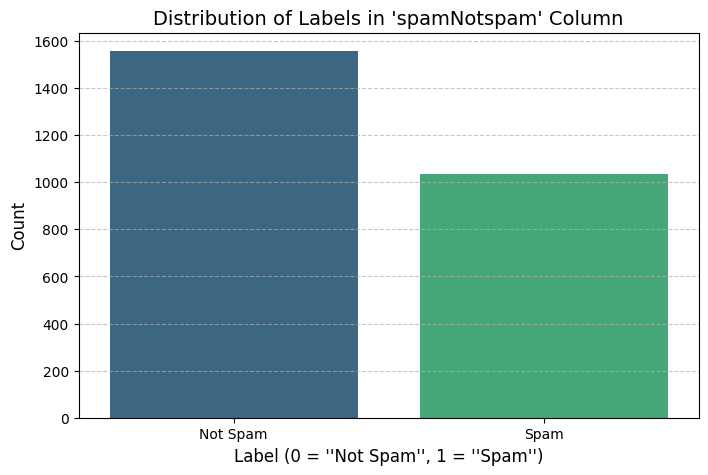

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of labels in the 'spamNotspam' column
label_counts = df['spamNotspam'].value_counts()
print(label_counts)
# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add details to the plot
plt.title("Distribution of Labels in 'spamNotspam' Column", fontsize=14)
plt.xlabel("Label (0 = ''Not Spam'', 1 = ''Spam'')", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From output above, we can see that the dataset's label distribution for the `spamNotspam` column is as follows:  

- **Label `0` (Not Spam)**: 1,557 samples  
- **Label `1` (Spam)**: 1,035 samples  

This indicates that there are more **not-spam reviews** than **spam reviews**, leading to an imbalance in the dataset. Despite this imbalance, we aim to develop a model capable of handling imbalanced data effectively. Therefore, we have chosen not to apply additional data balancing techniques, relying on the model's ability to generalize well across both classes.

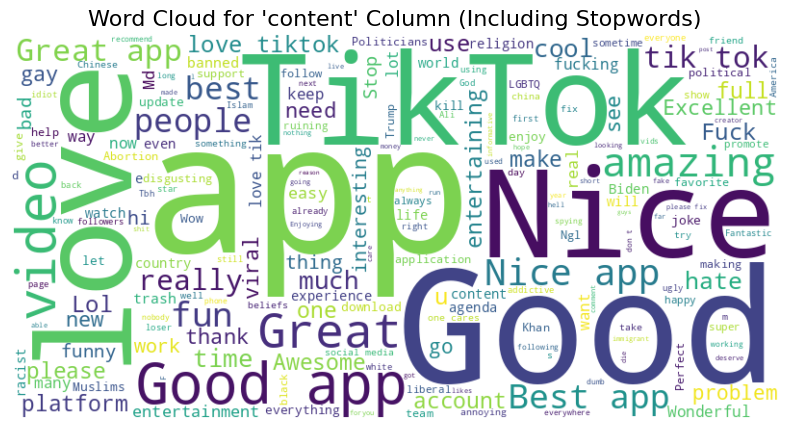

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text in the 'content' column
text = " ".join(content for content in df['content'])

# Generate the word cloud including stopwords
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud for 'content' Column (Including Stopwords)", fontsize=16)
plt.show()


In the word cloud, there are some frequent words like **"good," "app," "tiktok"**.

These words have specific meanings:

- **"Good"**: Indicates positive feedback, common in non-spam reviews.
- **"App"**: Refers to the application being reviewed, appearing often in legitimate reviews.
- **"Tiktok"**: Highlights reviews related to the TikTok app, which may help identify spammy content or trends.

These words help distinguish between spam and non-spam reviews.

**Notes:**
In the word cloud analysis, some typos were observed in the text. However, we have decided not to handle these typos, as they do not significantly affect the analysis. Additionally, we want the model to be able to handle and generalize well even in the presence of typos. Therefore, we have chosen not to apply any typo correction techniques, allowing the model to learn patterns in the data as is.

## **Data Preprocessing**

### **Data Cleansing**

- Convert all text to lowercase.  
- Remove numbers
- Remove punctuation marks, and characters such as `!`, `•`.  
- Handle emoticons  
- Remove symbols
- Remove extra white spaces that may appear after removing characters.  


####**Handle Emoticons**

In [ ]:
print(df.loc[214, 'content'])

Enjoying happy mood and thank you so much 🥰


In [ ]:
print(df.loc[87, 'content'])

 homosexuality🏳️‍🌈


From the outputs above, we see that some emojis convey positive meanings, while others may seem negative or spam-like. Emojis play a role in defining whether a review is spam, so instead of removing them, we will flag them to help the model distinguish between spam and non-spam.

#### **Set Emoticons**

In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 15.7 MB/s eta 0:00:00


**Emoticons in regex that we listed**

Below are examples of some of the emojis that are detected by each range specified in regex:

1. **Emoticons (😀 - 😯)**: These are facial expressions and emotions.
   - Example Emojis: 😀, 😁, 😂, 😍, 😎, 😭, 😤

2. **Miscellaneous Symbols and Pictographs (🀀 - 🧿)**: This block includes various symbols and pictographs, including weather, food, and objects.
   - Example Emojis: 🌞, ☀️, 🏅, 🍏, 🍕, 🧊, 🧿

3. **Transport and Map Symbols (🚀 - 🚿)**: This block includes symbols related to transport, geography, and directions.
   - Example Emojis: 🚗, 🚕, 🚠, 🛳, ✈️, 🛣️, 🏁

4. **Alchemical Symbols (🜀 - 🜿)**: This block includes alchemical and ancient symbols.
   - Example Emojis: 🜀, 🜁, 🜂, 🜃

5. **Geometric Shapes Extended (🟠 - 🔷)**: This block includes geometric shapes like circles, squares, and diamonds.
   - Example Emojis: 🟠, 🔵, 🔶, 🔷, 🔸, 🔺

6. **Supplemental Arrows-C (⤴️ - ⤻)**: This block includes various arrows used in navigation or other symbols.
   - Example Emojis: ⤴️, ⤵️, 🔽, 🔼

7. **Supplemental Symbols and Pictographs (🛑 - 🛠️)**: This block includes symbols used for various signs and other pictographs.
   - Example Emojis: 🛑, 🔒, 🔓, ⚡, 🛠️

8. **Chess Symbols (♟️ - ♞)**: This block includes chess-related symbols.
   - Example Emojis: ♟️, ♞, ♜, ♝, ♛, ♚

9. **Symbols and Pictographs Extended-A (🅰 - 🅾)**: This block includes more extended symbols and pictographs.
   - Example Emojis: 🅰, 🅾, 🅿️, 🏧

10. **Dingbats (✝️ - ✡️)**: This block includes a variety of symbols including crosses and religious symbols.
   - Example Emojis: ✝️, ✡️, 🕎, 🛐

11. **Enclosed Characters (🅾 - 🅿️)**: This includes enclosed alphanumeric characters.
   - Example Emojis: 🅾, 🅿️, 🅰, 🅱

12. **Regional Indicator Symbols (🇦🇺 - 🇿🇦)**: This block includes country flag symbols.
   - Example Emojis: 🇦🇺 (Australia), 🇬🇧 (United Kingdom), 🇯🇵 (Japan)

13. **Additional Symbols (⁉️ - ➕)**: This block includes other symbols and punctuation marks.
   - Example Emojis: ⁉️, ➕, ➖, 🔃

14. **Playing Cards (🃏 - 🀄)**: This block includes playing card symbols.
   - Example Emojis: 🃏, 🀄, 🃁, 🃂


**Sensitive Emoticons**


1. 🏳️‍🌈 - Rainbow Flag (often represents LGBTQ+ pride)
2. 🥵 - Hot Face (usually represents feeling overheated or sweating)
3. ☠ - Skull and Crossbones (often symbolizes danger or death)
4. 💀 - Skull (commonly used to represent death or something creepy)
5. 💒 - Wedding Chapel (used to represent weddings or marriage)
6. ⛪ - Church (used to represent religious settings or Christianity)
7. 🕌 - Mosque (used to represent Islam or mosques)
8. 🕍 - Synagogue (used to represent Judaism or synagogues)
9. 🕋 - Kaaba (important religious symbol in Islam)
10. 🛕 - Hindu Temple (represents Hinduism and temples)
11. 🗡 - Dagger (represents a weapon or something dangerous)
12. 💣 - Bomb (symbolizes an explosion or something dangerous)
13. 🧨 - Dynamite (used to represent explosives)
14. 🪓 - Axe (can represent violence or tools)
15. 🔪 - Knife (symbolizes sharp objects or danger)
16. ✝ - Latin Cross (represents Christianity)
17. ☪ - Star and Crescent (used to represent Islam)
18. 🕉 - Om (represents Hinduism, Buddhism, and other eastern religions)
19. ☸ - Wheel of Dharma (represents Buddhism)
20. 🪯 - Mace (used as a weapon or symbol)
21. ✡ - Star of David (represents Judaism)
22. 🔯 - Six-Pointed Star with Dot (used in Jewish contexts)
23. 🕎 - Menorah (represents the Jewish festival of Hanukkah)
24. ☯ - Yin Yang (symbolizing balance in Taoism)
25. ☦ - Orthodox Cross (represents the Orthodox Christian church)
26. 🖕 - Middle Finger (commonly used to represent an obscene gesture)



In [ ]:
import re # using regular expression

# Define sensitive emojis
sensitive_emojis = set([
    '🏳️‍🌈', '🥵', '☠', '💀', '💒', '⛪', '🕌', '🕍', '🕋', '🛕', '🗡', '💣', '🧨', '🪓', '🔪', '✝', '☪', '🕉',
    '☸', '🪯', '✡', '🔯', '🕎', '☯', '☦', '🖕'
])

# Function to detect emojis using regular expression (updated to detect more emojis)
emoji_pattern = re.compile(
    '['
    '\U0001F600-\U0001F64F'  # Emoticons
    '\U0001F300-\U0001F5FF'  # Miscellaneous Symbols and Pictographs
    '\U0001F680-\U0001F6FF'  # Transport and Map Symbols
    '\U0001F700-\U0001F77F'  # Alchemical Symbols
    '\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
    '\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
    '\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
    '\U0001FA00-\U0001FA6F'  # Chess Symbols
    '\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
    '\U00002702-\U000027B0'  # Dingbats
    '\U000024C2-\U0001F251'  # Enclosed Characters
    '\U0001F1E6-\U0001F1FF'  # Regional Indicator Symbols
    '\U00002000-\U00002BFF'  # Additional symbols
    '\U0001F004-\U0001F0CF'  # Playing Cards
    ']+', flags=re.UNICODE)


#### **Cleansing**

In [ ]:
# Function to clean the text and flag emojis as either 'normal' or 'sensitive'
def clean_text_with_flags(text):
    # Convert all text to lowercase
    text = text.lower()

    # Remove numbers and specific symbols like '¹'
    text = re.sub(r'[\d¹]+', '', text)  # Remove digits and the symbol '¹'

    # Handle emoticons - Flag emojis as 'normal' or 'sensitive' directly within the text
    def flag_emoticons(match):
        emoji_char = match.group(0)
        if emoji_char in sensitive_emojis:
            return '[ sensitive]'
        else:
            return '[ normal]'

    # Replace emojis with a flag (normal or sensitive) and remove them from the text
    text = emoji_pattern.sub(flag_emoticons, text)

    # Remove symbols or any character that is NOT a letter or space
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters, keep spaces

    # Remove punctuation marks (except emojis)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation marks (but keep spaces and words)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Apply the clean_text_with_flags function and store the result in a new column
df['cleaned_content'] = df['content'].apply(clean_text_with_flags)

# Display the cleaned data
display(df[['content', 'cleaned_content']].iloc[1285:1295])

,content,cleaned_content
1285,1 stor + L + ratio,stor l ratio
1286,💓💓💓,normal
1287,🔥,normal
1288,Salman King,salman king
1289,5Loin for.shelby martin¹,loin forshelby martin
1290,Mehrab Khan,mehrab khan
1291,Can u please stop telling me about killing my ...,can u please stop telling me about killing my ...
1292,💩💩💩💩💩💩💩💩💩💩💩💩💩💩👺👻🤬😡😤🥱😫😩😭,normal
1293,sk mahabub,sk mahabub
1294,Karachi,karachi


In [ ]:
print(df.loc[214, 'cleaned_content'])

enjoying happy mood and thank you so much normal


In [ ]:
print(df.loc[87, 'cleaned_content'])

homosexuality sensitive


From the results above, we can see that the cleansing process has been successful. The "cleaned_content" column shows that irrelevant characters and emojis have been properly handled, ensuring that the content is now cleaner and more suitable for analysis.

### **Data Splitting**
Ratio:
- Training: 80%
- Testing: 20%

In [ ]:
df.columns

Index(['spamNotspam', 'content', 'cleaned_content'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into Training and Testing Sets

x = df[['cleaned_content']]
y = df['spamNotspam']  # Label column

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=df['spamNotspam'])
# stratify on the label --> ensures the distribution in training and testing matches the original proportions


In [ ]:
X_train.shape

(2073, 1)

In [ ]:
X_test.shape

(519, 1)

In [ ]:
y_train.shape

(2073,)

In [ ]:
y_test.shape

(519,)

### **Check missing values**

In [ ]:
# Checking for missing values
print("Missing values in each column:")
print(X_train.isnull().sum())

Missing values in each column:
cleaned_content    0
dtype: int64


From output above, we can see that there are no missing values in X_train.

### **Tokenization**

In [ ]:
# Libraries

# Install nltk
!pip install nltk

# For tokenization
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resource for tokenization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Function for tokenization
def tokenize_text(text):
    return word_tokenize(text)

# Tokenization for 'cleaned_content' in training data
X_train['tokenized_content'] = X_train['cleaned_content'].apply(tokenize_text)

# Tokenization for 'cleaned_content' in testing data
X_test['tokenized_content'] = X_test['cleaned_content'].apply(tokenize_text)


In [ ]:
# Display comparison of before and after stopword removal
print(X_train[['cleaned_content', 'tokenized_content']].head(3))

             cleaned_content           tokenized_content
1984                    nice                      [nice]
1435  amazing incredible app  [amazing, incredible, app]
918                     good                      [good]


From output above, we can see that the tokenization process was successful. Each comment has been broken down into individual tokens

### **Stopwords Removal**

In [ ]:
# Libraries
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Remove stopwords from the 'tokenized_content' column for training and testing data
X_train['stopwords_content'] = X_train['tokenized_content'].apply(remove_stopwords)
X_test['stopwords_content'] = X_test['tokenized_content'].apply(remove_stopwords)

In [ ]:
# Display comparison of before and after stopword removal
print(X_train[['tokenized_content', 'stopwords_content']].iloc[1705:1710])

                                      tokenized_content  \
1880                                     [its, awesome]   
582                                              [good]   
2043                                              [fun]   
1901                   [luv, this, app, its, the, best]   
821   [this, app, is, interesting, because, it, brin...   

                                      stopwords_content  
1880                                          [awesome]  
582                                              [good]  
2043                                              [fun]  
1901                                   [luv, app, best]  
821   [app, interesting, brings, funny, videos, save...  


From output above we can see that stopwords like **"its," "the,"** and **"this"** are removed, while important tokens like **"awesome," "app," "best,"** and **"interesting"** remain.



### **Lemmatization/Stemming**

In [ ]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to perform stemming on tokens
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Apply stemming on the tokenized data after stopword removal
X_train['stemmed_content'] = X_train['stopwords_content'].apply(stem_tokens)
X_test['stemmed_content'] = X_test['stopwords_content'].apply(stem_tokens)

# Display a sample of the data for comparison
print(X_train[['stopwords_content', 'stemmed_content']].iloc[1710:1716])


                                      stopwords_content  \
917                                         [good, app]   
1566                           [hate, girls, flat, ass]   
2122                  [beliefs, wrong, go, islam, love]   
893                                           [awesome]   
1625                                             [nice]   
1461  [love, looking, sharing, tiktok, videos, much,...   

                                    stemmed_content  
917                                     [good, app]  
1566                        [hate, girl, flat, ass]  
2122               [belief, wrong, go, islam, love]  
893                                        [awesom]  
1625                                         [nice]  
1461  [love, look, share, tiktok, video, much, fun]  


From the output above, we can see that the stemming process successfully reduced words to their base forms. For example, the word **"looking"** was changed to **"look"** or **"beliefs"** was changed to **"belief"** which is the base form of the verb.




## **Text Representation**

### **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer object
vectorizer = TfidfVectorizer()

In [ ]:
# Join tokens into single strings for each document in the training and testing datasets
aggregate_texts_train = [' '.join(doc) for doc in X_train['stemmed_content']]
aggregate_texts_test = [' '.join(doc) for doc in X_test['stemmed_content']]

In [ ]:
# Fit the vectorizer to the training data and transform the data into TF-IDF features
train_tfidf= vectorizer.fit_transform(aggregate_texts_train)

# Transform the testing data into TF-IDF features using the same vectorizer that was fit on the training data
test_tfidf = vectorizer.transform(aggregate_texts_test)  # This step does not involve fitting, only transforming

In [ ]:
# Convert the sparse matrix of train TF-IDF features to a dense DataFrame for better readability and display the first few rows
TFIDF_train=pd.DataFrame(train_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
TFIDF_train.iloc[:, 20:25].head()

,add,addict,addison,administ,admit
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convert the sparse matrix of test TF-IDF features to a dense DataFrame for better readability and display the first few rows
TFIDF_test=pd.DataFrame(test_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
TFIDF_train.iloc[:, 20:25].head()

,add,addict,addison,administ,admit
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Display the shape of the TF-IDF matrix for the training data to understand the number of documents and features
train_tfidf.shape

(2073, 1625)

In [ ]:
# Display the shape of the TF-IDF matrix for the testing data to understand the number of documents and features
test_tfidf.shape

(519, 1625)

In [ ]:
# Extract and display the column names of the TF-IDF feature matrix, which correspond to the terms in the vocabulary
col=TFIDF_train.columns
print(col[20:25])

Index(['add', 'addict', 'addison', 'administ', 'admit'], dtype='object')


In [ ]:
col=TFIDF_test.columns
print(col[20:25])

Index(['add', 'addict', 'addison', 'administ', 'admit'], dtype='object')


### **Word2Vec (skipgram)**

In [ ]:
import gensim
from gensim.models import Word2Vec

# Initialize the Skipgram model using the Gensim library
# Train a Word2Vec model using the Skip-Gram method
model_skipgram = gensim.models.Word2Vec(
    X_train['stemmed_content'],  # Input data: tokenized and stemmed text content
    min_count=3,                # Ignore words that appear less than 3 times in the corpus
    vector_size=50,             # Set the dimensionality of the word vectors to 50
    window=5,                   # Use a context window of 5 words on each side
    sg=1                        # Use the Skip-Gram model (sg=1); otherwise, it would use CBOW (sg=0)
)

#### **Average word vectors**

Used for traditional machine learning modeling

In [ ]:
# Define a function to convert lists of tokens into their corresponding word vectors using the trained model
def generate_word_vectors(tokens_list, model):
    vectors = []  # Initialize a list to store the result vectors
    for tokens in tokens_list:  # Iterate through each list of tokens
        # Convert each token to its vector representation if it exists in the model's vocabulary
        vectorized_tokens = [model.wv[word] if word in model.wv else None for word in tokens]
        # Filter out None values from vectorized tokens
        vectorized_tokens = [vector for vector in vectorized_tokens if vector is not None]

        if vectorized_tokens:
            # Compute the average vector if there are any valid vectors
            average_vector = sum(vectorized_tokens) / len(vectorized_tokens)
            vectors.append(average_vector)  # Append the average vector to the list
        else:
            # If no valid tokens are found, append a zero vector of the same length as the word vectors
            vectors.append([0] * model.vector_size)
    return vectors  # Return the list of vectors

In [ ]:
# Convert tokens in the training and tetsing data into vectors using the Skipgram model
x_train_vectors_skipgram = generate_word_vectors(X_train['stemmed_content'], model_skipgram)
x_test_vectors_skipgram = generate_word_vectors(X_test['stemmed_content'], model_skipgram)

In [ ]:
# Display the first two vectorized outputs from the training data
x_train_vectors_skipgram[0:2]

[array([ 0.03336168, -0.01223314,  0.00710065,  0.04135387, -0.02454056,
        -0.06089903,  0.08735877,  0.06700419, -0.06013045,  0.01362707,
         0.026243  ,  0.01592236,  0.07158765,  0.04973179, -0.05295879,
         0.02635534,  0.03088542, -0.01260849, -0.08058357, -0.01123548,
        -0.0120694 ,  0.05234464,  0.01916873, -0.04934229,  0.04100356,
        -0.03664692, -0.00208946,  0.02812858, -0.05691317, -0.03635242,
         0.02190359,  0.05555131, -0.04621193,  0.05651241, -0.02900349,
         0.02083493,  0.0628676 , -0.00707203,  0.01400672, -0.03429412,
         0.05257237, -0.03618252, -0.0071226 ,  0.04912653,  0.11541319,
        -0.00664624,  0.03974951, -0.06604464,  0.05414739, -0.03220679],
       dtype=float32),
 array([ 0.03968551,  0.02088249,  0.02450477,  0.09393781, -0.08147557,
        -0.2230593 ,  0.1998932 ,  0.15968871, -0.17655858, -0.01465768,
         0.12100957,  0.02290252,  0.21095416,  0.1623302 , -0.17319483,
         0.03202251,  0.039

In [ ]:
# Display the first two vectorized outputs from the testing data
x_test_vectors_skipgram[0:2]

[array([ 0.03843818,  0.0269984 ,  0.02826486,  0.03556437, -0.04633395,
        -0.08938099,  0.07161367,  0.08388076, -0.07075001,  0.00929208,
         0.06707601,  0.0133979 ,  0.0985762 ,  0.07796227, -0.05698169,
         0.00490453,  0.0167417 , -0.00551417, -0.11171558, -0.0193878 ,
        -0.01485129,  0.09633511,  0.00069302, -0.07289566,  0.0704612 ,
        -0.02161166,  0.00560007,  0.03699115, -0.06905168, -0.01763538,
         0.06375214,  0.05406479, -0.07495707,  0.07483833, -0.04934584,
         0.03855827,  0.06580997,  0.00384045,  0.02694294, -0.01324289,
         0.08027761, -0.03862069, -0.03201452,  0.06791089,  0.1573233 ,
        -0.03462212,  0.02037559, -0.0742913 ,  0.08746387, -0.07106549],
       dtype=float32),
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

#### **Embedding matrix + Padding**

Used for Deep learning modeling

In [ ]:
# Embedding Matrix
from tensorflow.keras.preprocessing.text import Tokenizer

word_vec_dict = {word: model_skipgram.wv[word] for word in model_skipgram.wv.index_to_key}

# Parameters
vocab_size = 35000
embed_dim = model_skipgram.vector_size

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train['stemmed_content'])

In [ ]:
import numpy as np

embed_matrix = np.zeros((vocab_size, embed_dim))
for word, i in tokenizer.word_index.items():
    if word in word_vec_dict:  # Check if word is in word2vec dictionary
        embed_matrix[i] = word_vec_dict[word]

In [ ]:
print(f"Shape of embedding matrix: {embed_matrix.shape}")

Shape of embedding matrix: (35000, 50)


In [ ]:
# Padding sequences for input preparation in deep learning models

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert text data to numerical sequences using the tokenizer
X_train_seq = tokenizer.texts_to_sequences(X_train['stemmed_content'])  # Transform training text data into sequences of word indices
X_test_seq = tokenizer.texts_to_sequences(X_test['stemmed_content'])    # Transform testing text data into sequences of word indices

# Determine the maximum sequence length based on data analysis
max_sen_len = max(len(seq) for seq in X_train_seq)  # Find the longest sequence length in the training data

# Pad sequences to ensure uniform length
X_train_pad = pad_sequences(
    X_train_seq,                # Input training sequences
    maxlen=max_sen_len,         # Pad or truncate to the maximum sequence length
    padding='post',             # Add padding at the end of sequences
    truncating='post'           # Truncate sequences from the end if they exceed max length
)
X_test_pad = pad_sequences(
    X_test_seq,                 # Input testing sequences
    maxlen=max_sen_len,         # Pad or truncate to the same length as the training data
    padding='post',             # Add padding at the end of sequences
    truncating='post'           # Truncate sequences from the end if they exceed max length
)

# Verify the shape of the padded sequences
print(f"Shape of X_train_pad: {X_train_pad.shape}")  # Output the shape of the padded training data
print(f"Shape of X_test_pad: {X_test_pad.shape}")    # Output the shape of the padded testing data

Shape of X_train_pad: (2073, 73)
Shape of X_test_pad: (519, 73)


## **Modeling**

### **Traditional Machine Learning**

#### **Random Forest with TFIDF Method**

In [ ]:
from sklearn.metrics import classification_report # Import tools to generate a classification report for evaluating classifier performance
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an instance of Random Forest Classifier
rf_class_tfidf = RandomForestClassifier(random_state=42)

# Train the model using TFIDF
rf_class_tfidf.fit(train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels for the test set
test_predictions_tfidf = rf_class_tfidf.predict(test_tfidf)

In [ ]:
# Display classification report
print("Original Model Classification Report:")
print(classification_report(y_test, test_predictions_tfidf))

Original Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       312
           1       0.90      0.94      0.92       207

    accuracy                           0.93       519
   macro avg       0.93      0.94      0.93       519
weighted avg       0.94      0.93      0.93       519



#### **Random Forest - TF-IDF Model Output**:

- **Accuracy**: The model achieved an accuracy of **93%**, meaning it correctly classified 93% of all reviews.

- **Precision**:
  - **Class 0 (not spam)**: 96% precision, indicating that 96% of the reviews predicted as **Class 0 (not spam)** were actually **Class 0 (not spam)**.
  - **Class 1 (spam)**: 90% precision, meaning 90% of the reviews predicted as **Class 1 (spam)** were actually **Class 1 (spam)**.

- **Recall**:
  - **Class 0 (not spam)**: 93% recall, meaning the model correctly identified 93% of all actual **Class 0 (not spam)** reviews.
  - **Class 1 (spam)**: 94% recall, meaning the model correctly identified 94% of all actual **Class 1 (spam)** reviews.

- **F1-Score**:
  - **Class 0 (not spam)**: 94% F1-score, showing a good balance between precision and recall for **Class 0 (not spam)**.
  - **Class 1 (spam)**: 92% F1-score, reflecting strong performance in detecting **Class 1 (spam)**.

- **Macro Average**: 93% precision, 94% recall, and 93% F1-score across both classes.
- **Weighted Average**: 94% precision, 93% recall, and 93% F1-score, considering class imbalance.

This model demonstrates strong performance, effectively distinguishing between **Class 0 (not spam)** and **Class 1 (spam)**, with good precision and recall values for both classes.

#### **Random Forest with Word2Vec Method**

In [ ]:
# Create an instance of RandomForestClassifier with a fixed random state for reproducibility
rf_class_w2v = RandomForestClassifier(random_state=42)

# Train the model using Word2Vec vector representation from the training data
rf_class_w2v.fit(x_train_vectors_skipgram, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict labels for the test data using the trained model
test_predictions_w2v = rf_class_w2v.predict(x_test_vectors_skipgram)

In [ ]:
# Display the classification report
print('\nOriginal Model Classification Report\n')
print(classification_report(y_test, test_predictions_w2v))


Original Model Classification Report

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       312
           1       0.88      0.82      0.85       207

    accuracy                           0.88       519
   macro avg       0.88      0.87      0.88       519
weighted avg       0.88      0.88      0.88       519



#### **Random Forest - Word2Vec Model Output**:

- **Accuracy**: The model achieved an accuracy of **88%**, meaning it correctly classified 88% of all reviews.

- **Precision**:
  - **Class 0 (not spam)**: 89% precision, indicating that 89% of the reviews predicted as **Class 0 (not spam)** were actually **Class 0 (not spam)**.
  - **Class 1 (spam)**: 88% precision, meaning 88% of the reviews predicted as **Class 1 (spam)** were actually **Class 1 (spam)**.

- **Recall**:
  - **Class 0 (not spam)**: 93% recall, meaning the model correctly identified 93% of all actual **Class 0 (not spam)** reviews.
  - **Class 1 (spam)**: 82% recall, meaning the model correctly identified 82% of all actual **Class 1 (spam)** reviews.

- **F1-Score**:
  - **Class 0 (not spam)**: 91% F1-score, showing a good balance between precision and recall for **Class 0 (not spam)**.
  - **Class 1 (spam)**: 85% F1-score, reflecting good performance in detecting **Class 1 (spam)**.

- **Macro Average**: 88% precision, 87% recall, and 88% F1-score across both classes.
- **Weighted Average**: 88% precision, 88% recall, and 88% F1-score, considering class imbalance.

This model demonstrates good overall performance, although recall for **Class 1 (spam)** could be improved. However, it provides a good balance between precision and recall for both classes.

#### **SVM with TF-IDF Method**

In [ ]:
from sklearn import svm                  # Import svm module from scikit-learn to access support vector machine algorithms
from sklearn.svm import SVC              # Import SVC from scikit-learn for support vector classification

In [ ]:
# Initialize the LineaarSVC model
svc = svm.LinearSVC(random_state=42)

# Fit the model on the training data
svc.fit(train_tfidf, y_train)

LinearSVC(random_state=42)

In [ ]:
# Predict the labels for the test set
test_svc=svc.predict(test_tfidf)

In [ ]:
# Display classification report
print('\nOriginal Model Classification Report\n')
print(classification_report(y_test, test_svc))


Original Model Classification Report

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       312
           1       0.91      0.97      0.94       207

    accuracy                           0.95       519
   macro avg       0.95      0.96      0.95       519
weighted avg       0.95      0.95      0.95       519



#### **SVM - TF-IDF Model Output**:

- **Accuracy**: The model achieved an accuracy of **95%**, meaning it correctly classified 95% of all reviews.

- **Precision**:
  - **Class 0 (not spam)**: 98% precision, indicating that 98% of the reviews predicted as **Class 0 (not spam)** were actually **Class 0 (not spam)**.
  - **Class 1 (spam)**: 91% precision, meaning 91% of the reviews predicted as **Class 1 (spam)** were actually **Class 1 (spam)**.

- **Recall**:
  - **Class 0 (not spam)**: 94% recall, meaning the model correctly identified 94% of all actual **Class 0 (not spam)** reviews.
  - **Class 1 (spam)**: 97% recall, meaning the model correctly identified 97% of all actual **Class 1 (spam)** reviews.

- **F1-Score**:
  - **Class 0 (not spam)**: 96% F1-score, showing a strong balance between precision and recall for **Class 0 (not spam)**.
  - **Class 1 (spam)**: 94% F1-score, reflecting strong performance in detecting **Class 1 (spam)**.

- **Macro Average**: 95% precision, 96% recall, and 95% F1-score across both classes.
- **Weighted Average**: 95% precision, 95% recall, and 95% F1-score, considering class imbalance.

This model performs excellently, with high precision and recall for both **Class 0 (not spam)** and **Class 1 (spam)**, providing a balanced and robust performance.

#### **SVM with Word2Vec Method**

In [ ]:
# Set up and fit an SVM model using LinearSVC with a random state for reproducibility
svc_class= svm.LinearSVC(random_state=42)
svc_class.fit(x_train_vectors_skipgram, y_train)

LinearSVC(random_state=42)

In [ ]:
# Predict using the fitted model and evaluate the model's performance
test_svc_class=svc_class.predict(x_test_vectors_skipgram)

In [ ]:
# Print classification report
print('\nOriginal Model Classification Report\n')
print(classification_report(y_test, test_svc_class))


Original Model Classification Report

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       312
           1       0.81      0.68      0.74       207

    accuracy                           0.81       519
   macro avg       0.81      0.79      0.79       519
weighted avg       0.81      0.81      0.81       519



#### **SVM - Word2Vec Model Output**:

- **Accuracy**: The model achieved an accuracy of **81%**, meaning it correctly classified 81% of all reviews.

- **Precision**:
  - **Class 0 (not spam)**: 81% precision, indicating that 81% of the reviews predicted as **Class 0 (not spam)** were actually **Class 0 (not spam)**.
  - **Class 1 (spam)**: 81% precision, meaning 81% of the reviews predicted as **Class 1 (spam)** were actually **Class 1 (spam)**.

- **Recall**:
  - **Class 0 (not spam)**: 89% recall, meaning the model correctly identified 89% of all actual **Class 0 (not spam)** reviews.
  - **Class 1 (spam)**: 68% recall, meaning the model correctly identified 68% of all actual **Class 1 (spam)** reviews.

- **F1-Score**:
  - **Class 0 (not spam)**: 85%, showing a solid balance between precision and recall for **Class 0 (not spam)**.
  - **Class 1 (spam)**: 74%, indicating that the model has room for improvement in detecting **Class 1 (spam)**.

- **Macro Average**: 81% precision, 79% recall, and 79% F1-score across both classes.
- **Weighted Average**: 81% precision, 81% recall, and 81% F1-score, considering class imbalance.

This model shows decent performance, but the recall for **Class 1 (spam)** can be improved for better identification of spam content.

#### **Logistic Regression with TF-IDF Method**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # max_iter to avoid convergence warnings
log_reg.fit(train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
test_log = log_reg.predict(test_tfidf)

In [ ]:
# Print classification report (precision, recall, f1-score, etc.)
print("\nOriginal Model Classification Report:")
print(classification_report(y_test, test_log))


Original Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       312
           1       0.88      0.98      0.93       207

    accuracy                           0.94       519
   macro avg       0.93      0.94      0.94       519
weighted avg       0.94      0.94      0.94       519



#### **Logistic Regression - TF-IDF Model Output**:

- **Accuracy**: The model achieved an accuracy of **94%**, meaning it correctly classified 94% of all reviews.

- **Precision**:
  - **Class 0 (not spam)**: 98% precision, indicating that 98% of the reviews predicted as **Class 0 (not spam)** were actually **Class 0 (not spam)**.
  - **Class 1 (spam)**: 88% precision, meaning 88% of the reviews predicted as **Class 1 (spam)** were actually **Class 1 (spam)**.

- **Recall**:
  - **Class 0 (not spam)**: 91% recall, meaning the model correctly identified 91% of all actual **Class 0 (not spam)** reviews.
  - **Class 1 (spam)**: 98% recall, meaning the model correctly identified 98% of all actual **Class 1 (spam)** reviews.

- **F1-Score**:
  - **Class 0 (not spam)**: 95%, showing a strong balance between precision and recall for **Class 0 (not spam)**.
  - **Class 1 (spam)**: 93%, reflecting good performance for detecting **Class 1 (spam)**.

- **Macro Average**: 93% precision, 94% recall, and 94% F1-score across both classes.
- **Weighted Average**: 94% precision, 94% recall, and 94% F1-score, considering class imbalance.

This model performs well, especially in identifying **Class 1 (spam)** (spam) reviews, with a slight improvement needed in precision for **Class 0 (not spam)** (non-spam) reviews.

#### **Logistic Regression with Word2Vec Method**

In [ ]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # max_iter to avoid convergence warnings
log_reg.fit(x_train_vectors_skipgram, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
test_log_class = log_reg.predict(x_test_vectors_skipgram)

In [ ]:
# Print classification report (precision, recall, f1-score, etc.)
print("\nOriginal Model Classification Report:")
print(classification_report(y_test, test_log_class))


Original Model Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       312
           1       0.70      0.49      0.57       207

    accuracy                           0.71       519
   macro avg       0.71      0.67      0.68       519
weighted avg       0.71      0.71      0.70       519



#### **Logistic Regression - Word2Vec Model Output**:

- **Accuracy**: The model achieved an accuracy of **71%**, meaning it correctly classified 71% of all reviews.

- **Precision**:
  - **Class 0 (not spam)**: 72% precision, indicating that 72% of the reviews predicted as **Class 0 (not spam)** were actually **Class 0 (not spam)**.
  - **Class 1 (spam)**: 70% precision, meaning 70% of the reviews predicted as **Class 1 (spam)** were actually **Class 1 (spam)**.

- **Recall**:
  - **Class 0 (not spam)**: 86% recall, meaning the model correctly identified 86% of all actual **Class 0 (not spam)** reviews.
  - **Class 1 (spam)**: 49% recall, meaning the model correctly identified only 49% of all actual **Class 1 (spam)** reviews.

- **F1-Score**:
  - **Class 0 (not spam)**: 78%, showing a reasonable balance between precision and recall for **Class 0 (not spam)**.
  - **Class 1 (spam)**: 57%, indicating that the model has room for improvement in detecting **Class 1 (spam)** reviews.

- **Macro Average**: 71% precision, 67% recall, and 68% F1-score across both classes.
- **Weighted Average**: 71% precision, 71% recall, and 70% F1-score, considering class imbalance.

While the model performs decently in identifying **Class 0 (not spam)** reviews, it struggles with **Class 1 (spam)** reviews, particularly in recall.

### **Deep Learning**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Embedding, Flatten, Dropout
import warnings

import warnings
warnings.filterwarnings("ignore")

**Model Main Parameters:**

- **Dropout rate**: 0.5 (used to prevent overfitting by randomly dropping 50% of neurons during training).
- **Epoch**: 10
- **Activation functions**:  
  - **ReLU**: Applied in hidden layers for non-linear transformations.  
  - **Sigmoid**: Used in the output layer for binary classification tasks.  
- **Optimizer**: Adam (an adaptive and efficient optimization algorithm suitable for deep learning).  
- **Loss function**: Binary Crossentropy (measures the performance of binary classification models).  

#### **CNN Model**

In [ ]:
def build_cnn_model(input_shape, embedding_matrix=None):
    model = Sequential()  # Create a Sequential model to add layers sequentially

    # Embedding layer: Used for converting input data (text) into dense vectors
    if embedding_matrix is not None:  # If an embedding matrix is provided
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], weights=[embedding_matrix], input_length=input_shape[2], trainable=False))  # Use provided embedding matrix, don't train it
    else:
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], input_length=input_shape[2]))  # If no embedding matrix, train the embeddings from scratch

    # Convolutional layer: Applies filters to the input to extract features
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # Apply 128 filters with a kernel size of 5 and ReLU activation

    model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer to reduce the dimensionality by taking the maximum value from a set of values

    # Flatten layer: Converts the 2D data into 1D so it can be passed to the Dense layers
    model.add(Flatten())  # Flatten the 2D output into a 1D vector

    # Dense layer: Fully connected layer that learns complex features
    model.add(Dense(128, activation='relu'))  # Add a Dense layer with 128 units and ReLU activation

    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting by randomly setting 50% of the neurons to 0 during training

    model.add(Dense(64, activation='relu'))  # Add another Dense layer with 64 units and ReLU activation

    # Output layer: Outputs the prediction for binary classification (0 or 1)
    model.add(Dense(1, activation='sigmoid'))  # Add the output layer with 1 unit and sigmoid activation for binary classification

    # Compile the model with Adam optimizer and binary cross-entropy loss function for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model  # Return the constructed model

#### **CNN with TF-IDF Method**

In [ ]:
cnn_tfidf = build_cnn_model((train_tfidf.shape[0], train_tfidf.shape[1], 1))
cnn_tfidf.fit(train_tfidf.toarray(), y_train, epochs=10, batch_size=64, validation_data=(test_tfidf.toarray(), y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.5346 - loss: 0.8236 - val_accuracy: 0.6012 - val_loss: 0.6901
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 218ms/step - accuracy: 0.5924 - loss: 0.6885 - val_accuracy: 0.6012 - val_loss: 0.6816
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.5902 - loss: 0.6813 - val_accuracy: 0.6012 - val_loss: 0.6754
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.6079 - loss: 0.6737 - val_accuracy: 0.6012 - val_loss: 0.6734
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.6004 - loss: 0.6737 - val_accuracy: 0.6012 - val_loss: 0.6727
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.6044 - loss: 0.6718 - val_accuracy: 0.6012 - val_loss: 0.6725
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.5996 - loss: 0.6728 - val_accuracy: 0.6012 - val_loss: 0.6725
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.6109 - loss: 0.6686 - val_accuracy: 0

In [ ]:
# Step 1: Predict probabilities on test data
y_pred_cnn_tfidf = cnn_tfidf.predict(test_tfidf.toarray())

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y_pred_cnn_tfidf = np.where(y_pred_cnn_tfidf > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn_tfidf))


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       312
           1       0.00      0.00      0.00       207

    accuracy                           0.60       519
   macro avg       0.30      0.50      0.38       519
weighted avg       0.36      0.60      0.45       519



#### **CNN - TF-IDF Model Output**

##### **Training Results**:
- **Training Accuracy**: The model's accuracy started at **53.46%** and improved slightly to around **60%** but did not show much progress over 10 epochs.
- **Validation Accuracy**: Stayed constant at **60.12%**, indicating the model struggled to generalize to new data.

##### **Classification Report**:
- **Overall Accuracy**: **60%**, showing poor performance.
- **Class 0 (not spam)**: The model correctly identified 60% of Class 0 (not spam) with 100% recall.
- **Class 1 (spam)**: The model failed to identify any Class 1 (spam) reviews, with **0% precision and recall**.

##### **Indications of Underfitting**:
The model is underfitting because it didn't improve significantly during training and failed to classify Class 1 (spam) reviews, suggesting it hasn't learned well from the data.

##### **Conclusion**:
The model performs poorly, especially with Class 1 (spam) reviews.

#### **CNN with Word2Vec Method**

In [ ]:
cnn_word2vec = build_cnn_model((vocab_size, embed_dim, max_sen_len), embedding_matrix=embed_matrix)
cnn_word2vec.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5579 - loss: 0.6655 - val_accuracy: 0.7187 - val_loss: 0.5877
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7094 - loss: 0.5819 - val_accuracy: 0.7264 - val_loss: 0.5375
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7261 - loss: 0.5507 - val_accuracy: 0.7360 - val_loss: 0.5243
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7355 - loss: 0.5119 - val_accuracy: 0.7572 - val_loss: 0.5234
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7279 - loss: 0.5285 - val_accuracy: 0.7303 - val_loss: 0.4873
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7828 - loss: 0.4764 - val_accuracy: 0.8131 - val_loss: 0.4685
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.4613 - val_accuracy: 0.7592 - val_loss: 0.4578
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7794 - loss: 0.4351 - val_accuracy: 0.8035 - val_loss

In [ ]:
# Step 1: Predict probabilities on test data
y_pred_cnn_w2v = cnn_word2vec.predict(X_test_pad)

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y_pred_cnn_w2v = np.where(y_pred_cnn_w2v > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (Word2Vec):")
print(classification_report(y_test, y_pred_cnn_w2v))


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Classification Report (Word2Vec):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       312
           1       0.81      0.73      0.77       207

    accuracy                           0.83       519
   macro avg       0.82      0.81      0.82       519
weighted avg       0.83      0.83      0.82       519



#### **CNN - Word2vec Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy increased steadily from **55.79%** in the first epoch to **83.77%** at the end of the training, showing good improvement over 10 epochs.  
- **Validation Accuracy**: The validation accuracy started at **71.87%** and improved to **82.66%** by the last epoch, showing good generalization to unseen data.  

##### **Classification Report**:  
- **Overall Accuracy**: **83%**, indicating strong performance in classifying both classes.  
- **Class 0 (not spam)**: The model achieved **83% precision** and **89% recall**, meaning it was quite accurate in identifying Class 0 (not spam).  
- **Class 1 (spam)**: The model achieved **81% precision** and **73% recall**, performing well but with room for improvement in identifying Class 1 (spam).  

##### **Conclusion**:  
The model performs well overall, with strong accuracy and recall for both Class 0 (not spam) and Class 1 (spam).

#### **LSTM Model**

In [ ]:
def build_lstm_model(input_shape, embedding_matrix=None):
    model = Sequential()  # Create a Sequential model to add layers sequentially

    # Embedding layer: Converts input data into dense vectors (if embedding_matrix is provided, it uses the pre-trained weights)
    if embedding_matrix is not None:
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], weights=[embedding_matrix], input_length=input_shape[2], trainable=False))  # Use pre-trained embeddings (not trainable)
    else:
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], input_length=input_shape[2]))  # Train embeddings from scratch if no pre-trained matrix

    # LSTM layer: Long Short-Term Memory layer to capture sequential dependencies
    model.add(LSTM(128, return_sequences=False))  # LSTM with 128 units (to match MLP's size)

    # Dense layer: Fully connected layer to learn complex features from the output of LSTM
    model.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation

    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate to prevent overfitting

    model.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation

    # Output layer: Outputs the prediction for binary classification (0 or 1)
    model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation for binary classification

    # Compile the model with Adam optimizer and binary cross-entropy loss function for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model  # Return the constructed model


#### **LSTM with TFIDF Method**

In [ ]:
lstm_tfidf = build_lstm_model((train_tfidf.shape[0], train_tfidf.shape[1], 1))
lstm_tfidf.fit(train_tfidf.toarray(), y_train, epochs=10, batch_size=64, validation_data=(test_tfidf.toarray(), y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - accuracy: 0.5473 - loss: 0.6861 - val_accuracy: 0.6012 - val_loss: 0.6772
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.6129 - loss: 0.6757 - val_accuracy: 0.6012 - val_loss: 0.6737
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.6142 - loss: 0.6748 - val_accuracy: 0.6012 - val_loss: 0.6733
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 271ms/step - accuracy: 0.5797 - loss: 0.6799 - val_accuracy: 0.6012 - val_loss: 0.6748
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 270ms/step - accuracy: 0.6012 - loss: 0.6790 - val_accuracy: 0.6012 - val_loss: 0.6739
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.5855 - loss: 0.6785 - val_accuracy: 0.6012 - val_loss: 0.6727
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.5990 - loss: 0.6735 - val_accuracy: 0.6012 - val_loss: 0.6732
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 267ms/step - accuracy: 0.6008 - loss: 0.6760 - val_accuracy: 0

In [ ]:
# Step 1: Predict probabilities on test data
y_pred_lstm_tfidf = lstm_tfidf.predict(test_tfidf.toarray())

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y_pred_lstm_tfidf = np.where(y_pred_lstm_tfidf > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (LSTM with TF-IDF):")
print(classification_report(y_test, y_pred_lstm_tfidf))


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
Classification Report (LSTM with TF-IDF):
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       312
           1       0.00      0.00      0.00       207

    accuracy                           0.60       519
   macro avg       0.30      0.50      0.38       519
weighted avg       0.36      0.60      0.45       519



#### **LSTM - TF-IDF Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy started at **54.73%** and gradually improved to **60.80%** by the final epoch, showing very minimal improvement.  
- **Validation Accuracy**: Stayed constant at **60.12%**, indicating the model did not generalize well to the validation data.  

##### **Classification Report**:  
- **Overall Accuracy**: **60%**, indicating poor performance.  
- **Class 0 (not spam)**: The model performed decently in identifying Class 0 (not spam), with **60% precision** and **100% recall**.  
- **Class 1 (spam)**: The model failed to identify Class 1 (spam), with **0% precision and recall**.  

##### **Indications of Underfitting**:  
The model is underfitting as it did not improve significantly over the epochs and failed to detect Class 1 (spam), suggesting that it hasn't effectively learned the patterns in the data.  

##### **Conclusion**:  
The model shows poor performance, especially with Class 1 (spam).

#### **LSTM with Word2Vec Method**

In [ ]:
lstm_word2vec = build_lstm_model((vocab_size, embed_dim, max_sen_len), embedding_matrix=embed_matrix)
lstm_word2vec.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6110 - loss: 0.6851 - val_accuracy: 0.6012 - val_loss: 0.6728
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5861 - loss: 0.6790 - val_accuracy: 0.6012 - val_loss: 0.6748
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5748 - loss: 0.6885 - val_accuracy: 0.6012 - val_loss: 0.6731
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5850 - loss: 0.6853 - val_accuracy: 0.6012 - val_loss: 0.6727
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6048 - loss: 0.6719 - val_accuracy: 0.6012 - val_loss: 0.6725
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5941 - loss: 0.6759 - val_accuracy: 0.6012 - val_loss: 0.6726
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5992 - loss: 0.6741 - val_accuracy: 0.6012 - val_loss: 0.6725
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5978 - loss: 0.6745 - val_accuracy: 0.6012 - val_loss

In [ ]:
# Step 1: Predict probabilities on test data
y_pred_lstm_w2v = lstm_word2vec.predict(X_test_pad)

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y_pred_lstm_w2v = np.where(y_pred_lstm_w2v > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (LSTM with Word2Vec):")
print(classification_report(y_test, y_pred_lstm_w2v))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report (LSTM with Word2Vec):
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       312
           1       0.00      0.00      0.00       207

    accuracy                           0.60       519
   macro avg       0.30      0.50      0.38       519
weighted avg       0.36      0.60      0.45       519



#### **LSTM - Word2Vec Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy started at **61.10%** and showed slight fluctuation throughout the epochs, ending at **59.14%** by the final epoch, with no significant improvement.  
- **Validation Accuracy**: Stayed constant at **60.12%**, indicating that the model was unable to generalize well to new data.  

##### **Classification Report**:  
- **Overall Accuracy**: **60%**, indicating poor performance.  
- **Class 0 (not spam)**: The model performed decently in identifying Class 0 (not spam), with **60% precision** and **100% recall**.  
- **Class 1 (spam)**: The model failed to identify Class 1 (spam), with **0% precision and recall**.  

##### **Indications of Underfitting**:  
The model shows underfitting as it did not improve over epochs and failed to correctly identify Class 1 (spam), suggesting that it hasn't captured the necessary patterns from the data.  

##### **Conclusion**:  
The model demonstrates poor performance, particularly with identifying Class 1 (spam).

#### **MLP with TFIDF Method**

In [ ]:
def build_mlp_model(input_shape):
    model = Sequential()  # Create a Sequential model to add layers sequentially

    # Dense layer: Fully connected layer to learn complex features from the input
    model.add(Dense(128, input_dim=input_shape[1], activation='relu'))  # Add a Dense layer with 128 units and ReLU activation

    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate to prevent overfitting

    model.add(Dense(64, activation='relu'))  # Add another Dense layer with 64 units and ReLU activation

    # Output layer: Outputs the prediction for binary classification (0 or 1)
    model.add(Dense(1, activation='sigmoid'))  # Add the output layer with 1 unit and sigmoid activation for binary classification

    # Compile the model with Adam optimizer and binary cross-entropy loss function for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model  # Return the constructed model


In [ ]:
# Build the MLP model with the correct input shape based on the number of features from TF-IDF
mlp_tfidf = build_mlp_model((train_tfidf.shape[0], train_tfidf.shape[1]))

# Train the MLP model with TF-IDF input data
mlp_tfidf.fit(train_tfidf.toarray(), y_train, epochs=10, batch_size=64, validation_data=(test_tfidf.toarray(), y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.6082 - loss: 0.6767 - val_accuracy: 0.6416 - val_loss: 0.5931
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - loss: 0.5251 - val_accuracy: 0.9403 - val_loss: 0.2975
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9557 - loss: 0.2290 - val_accuracy: 0.9480 - val_loss: 0.1681
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9724 - loss: 0.1034 - val_accuracy: 0.9480 - val_loss: 0.1531
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9789 - loss: 0.0688 - val_accuracy: 0.9499 - val_loss: 0.1506
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9857 - loss: 0.0510 - val_accuracy: 0.9518 - val_loss: 0.1520
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9924 - loss: 0.0334 - val_accuracy: 0.9538 - val_loss: 0.1592
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.0243 - val_accuracy: 0.9576 - val_loss

In [ ]:
# Step 1: Predict probabilities on the test data
y_pred_mlp_tfidf = mlp_tfidf.predict(test_tfidf.toarray())

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y_pred_mlp_tfidf = np.where(y_pred_mlp_tfidf > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (MLP with TF-IDF):")
print(classification_report(y_test, y_pred_mlp_tfidf))


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report (MLP with TF-IDF):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       312
           1       0.94      0.97      0.95       207

    accuracy                           0.96       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.96      0.96      0.96       519



#### **MLP - TF-IDF Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The accuracy increased significantly, starting from **60.82%** in the first epoch and reaching **99.65%** by the last epoch.  
- **Validation Accuracy**: Showed a steady increase from **64.16%** to **96.15%**, indicating that the model generalized well to unseen data.  

##### **Classification Report**:  
- **Overall Accuracy**: **96%**, demonstrating strong performance.  
- **Class 0 (not spam)**: The model performed excellently, with **98% precision** and **96% recall**, resulting in an **97% f1-score**.  
- **Class 1 (spam)**: The model also performed well in identifying Class 1 (spam), with **94% precision** and **97% recall**, resulting in a **95% f1-score**.  

##### **Conclusion**:  
The MLP model with TF-IDF achieved outstanding performance in both precision and recall for both classes. It effectively classified both Class 0 (not spam) and Class 1 (spam), making it a reliable model for this task.  

#### **MLP with Word2Vec Method**

In [ ]:
# Function to build MLP model
def build_mlp_model(input_shape):
    model = Sequential()

    # Use input_shape[0] because input_shape is now a tuple (3650,)
    model.add(Dense(128, input_dim=input_shape[0], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Flatten X_train_pad and X_test_pad
X_train_flat = X_train_pad.reshape(X_train_pad.shape[0], -1)  # Flatten to (2073, 73*50)
X_test_flat = X_test_pad.reshape(X_test_pad.shape[0], -1)    # Flatten to (519, 73*50)

The Word2Vec representation produces a 3D matrix with dimensions (n_samples, sequence_length, embedding_dim). Before passing the data to the MLP, it must be flattened into a 2D matrix

In [ ]:
# Build the MLP model
mlp_word2vec = build_mlp_model((X_train_flat.shape[1],))  # Now input shape is (3650,)

# Train the MLP model
mlp_word2vec.fit(X_train_flat, y_train, epochs=10, batch_size=64, validation_data=(X_test_flat, y_test))

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4770 - loss: 14.8099 - val_accuracy: 0.5838 - val_loss: 1.9886
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5644 - loss: 6.6696 - val_accuracy: 0.6185 - val_loss: 2.6851
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6558 - loss: 5.6385 - val_accuracy: 0.6455 - val_loss: 1.4469
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6615 - loss: 5.3325 - val_accuracy: 0.6358 - val_loss: 1.8325
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 4.1549 - val_accuracy: 0.6378 - val_loss: 1.3917
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7023 - loss: 3.1673 - val_accuracy: 0.6975 - val_loss: 1.1129
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 3.9089 - val_accuracy: 0.6898 - val_loss: 1.0651
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7050 - loss: 2.9406 - val_accuracy: 0.6802 - val_los

In [ ]:
# Step 1: Predict probabilities on the test data
y_pred_mlp_w2v = mlp_word2vec.predict(X_test_flat)

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y_pred_mlp_w2v = np.where(y_pred_mlp_w2v > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (MLP with Word2Vec):")
print(classification_report(y_test, y_pred_mlp_w2v))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report (MLP with Word2Vec):
              precision    recall  f1-score   support

           0       0.70      0.86      0.78       312
           1       0.69      0.45      0.55       207

    accuracy                           0.70       519
   macro avg       0.70      0.66      0.66       519
weighted avg       0.70      0.70      0.68       519



#### **MLP - Word2Vec Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The accuracy improved from **47.7%** in the first epoch to **75.38%** in the final epoch.  
- **Validation Accuracy**: Increased from **58.38%** to **69.94%**, showing improvement but with more modest gains compared to the training accuracy.  

##### **Classification Report**:  
- **Overall Accuracy**: **70%**, indicating that the model has decent but not stellar performance.  
- **Class 0 (not spam)**: The model performs reasonably well on classifying Class 0 (not spam), with **70% precision** and **86% recall**, resulting in a **78% f1-score**.  
- **Class 1 (spam)**: The model struggles more with classifying Class 1 (spam), achieving **69% precision** and **45% recall**, which results in a **55% f1-score**.  
  

##### **Conclusion**:  
The MLP model with Word2Vec shows good performance on **Class 0 (not spam)**, but it struggles with identifying **Class 1 (spam)** reviews.

## **Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report

# Random Forest with TF-IDF
print("\nRandom Forest with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, test_predictions_tfidf))

# Random Forest with Word2Vec
print("\nRandom Forest with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, test_predictions_w2v))

# SVM with TF-IDF
print("\nSVM with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, test_svc))

# SVM with Word2Vec
print("\nSVM with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, test_svc_class))

# Logistic Regression with TF-IDF
print("\nLogistic Regression with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, test_log))

# Logistic Regression with Word2Vec
print("\nLogistic Regression with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, test_log_class))


Random Forest with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       312
           1       0.90      0.94      0.92       207

    accuracy                           0.93       519
   macro avg       0.93      0.94      0.93       519
weighted avg       0.94      0.93      0.93       519


Random Forest with Word2Vec Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       312
           1       0.88      0.82      0.85       207

    accuracy                           0.88       519
   macro avg       0.88      0.87      0.88       519
weighted avg       0.88      0.88      0.88       519


SVM with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       312
           1       0.91      0.97     

**Overall Assessment**:
- **SVM - TF-IDF** and **Random Forest - TF-IDF** models were the most balanced and effective across both classes, providing high accuracy and strong performance in identifying both **Class 0 (not spam)** and **Class 1 (spam)** reviews.
- **Logistic Regression - TF-IDF** was particularly strong in detecting **Class 1 (spam)** but had a slight dip in **Class 0 (not spam)** precision.
- The **SVM - Word2Vec** and **Logistic Regression - Word2Vec** models showed decent performance, but both struggled with **Class 1 (spam)** detection, especially in recall.

In summary, the **TF-IDF models** generally outperformed the **Word2Vec models**, with **SVM - TF-IDF** and **Random Forest - TF-IDF** achieving the best overall results.

In [ ]:
# Evaluating CNN with TF-IDF
print("\nCNN with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn_tfidf))

# Evaluating CNN with Word2Vec
print("\nCNN with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_cnn_w2v))

# Evaluating LSTM with TF-IDF
print("\nLSTM with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_lstm_tfidf))

# Evaluating LSTM with Word2Vec
print("\nLSTM with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_lstm_w2v))

# Evaluating MLP with TF-IDF
print("\nMLP with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp_tfidf))

# Evaluating MLP with Word2Vec
print("\nMLP with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_mlp_w2v))


CNN with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       312
           1       0.00      0.00      0.00       207

    accuracy                           0.60       519
   macro avg       0.30      0.50      0.38       519
weighted avg       0.36      0.60      0.45       519


CNN with Word2Vec Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       312
           1       0.81      0.73      0.77       207

    accuracy                           0.83       519
   macro avg       0.82      0.81      0.82       519
weighted avg       0.83      0.83      0.82       519


LSTM with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       312
           1       0.00      0.00      0.00       207

  

**Overall Assessment**:
- The **MLP - TF-IDF** model performed the best, achieving **96% accuracy** and excelling in both **Class 0 (not spam)** and **Class 1 (spam)**, showing no signs of underfitting or overfitting.
- The **CNN - Word2Vec** and **MLP - Word2Vec** models showed **decent performance** with **83%** and **70% accuracy**, respectively, but struggled with **Class 1 (spam)**, indicating potential underfitting, especially in detecting **Class 1 (spam)** reviews.
- The **CNN - TF-IDF**, **LSTM - TF-IDF**, and **LSTM - Word2Vec** models showed **poor performance**, with **60% accuracy** and underfitting across the board. These models failed to detect **Class 1 (spam)** effectively, suggesting they haven't learned the necessary patterns and require substantial improvement.

In summary, while the **MLP - TF-IDF** model showcased outstanding performance, the results do not suggest an overarching superiority of TF-IDF-based models over Word2Vec-based models.

In [ ]:
import matplotlib.pyplot as plt

# Function to evaluate and collect metrics from classification report
def get_classification_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']

# Model names
models = [
    "Random Forest with TF-IDF", "Random Forest with Word2Vec",
    "SVM with TF-IDF", "SVM with Word2Vec",
    "Logistic Regression with TF-IDF", "Logistic Regression with Word2Vec",
    "CNN with TF-IDF", "CNN with Word2Vec",
    "LSTM with TF-IDF", "LSTM with Word2Vec",
    "MLP with TF-IDF", "MLP with Word2Vec"
]

# Predictions for each model (Replace these variables with your actual predictions)
y_preds = [
    test_predictions_tfidf, test_predictions_w2v,
    test_svc, test_svc_class,
    test_log, test_log_class,
    y_pred_cnn_tfidf, y_pred_cnn_w2v,
    y_pred_lstm_tfidf, y_pred_lstm_w2v,
    y_pred_mlp_tfidf, y_pred_mlp_w2v
]

# List to store the metrics (accuracy, precision, recall, f1-score)
metrics = []

# Evaluate each model and collect metrics
for i in range(len(models)):
    accuracy, precision, recall, f1_score = get_classification_metrics(y_test, y_preds[i])
    metrics.append([accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=models)

# Print the metrics table
print(metrics_df)

                                   Accuracy  Precision    Recall  F1-Score
Random Forest with TF-IDF          0.934489   0.929441  0.935758  0.932218
Random Forest with Word2Vec        0.884393   0.883666  0.873769  0.877978
SVM with TF-IDF                    0.951830   0.946785  0.955059  0.950268
SVM with Word2Vec                  0.809249   0.809520  0.787695  0.794736
Logistic Regression with TF-IDF    0.938343   0.932427  0.944653  0.936725
Logistic Regression with Word2Vec  0.710983   0.706565  0.673449  0.677602
CNN with TF-IDF                    0.601156   0.300578  0.500000  0.375451
CNN with Word2Vec                  0.826590   0.823586  0.811060  0.815911
LSTM with TF-IDF                   0.601156   0.300578  0.500000  0.375451
LSTM with Word2Vec                 0.601156   0.300578  0.500000  0.375451
MLP with TF-IDF                    0.961464   0.958046  0.962258  0.960009
MLP with Word2Vec                  0.699422   0.695160  0.658143  0.660864


From the output above, we can observe the following:

1. **Best Performing Models**:
   - **SVM with TF-IDF** and **MLP with TF-IDF** are the top-performing models, with both achieving **high accuracy** (95% and 96%, respectively) and strong precision, recall, and F1-scores, making them reliable for both classes.
   
2. **Word2Vec Models**:
   - Models using **Word2Vec** generally show lower performance compared to **TF-IDF** models. For instance, **Logistic Regression with Word2Vec** and **MLP with Word2Vec** had accuracy below 71%, with **recall** especially low for identifying **Class 1 (spam)**.

3. **CNN and LSTM Models**:
   - Both **CNN** and **LSTM** models (with TF-IDF or Word2Vec) performed poorly, with **accuracy** around **60%** and **very low precision and recall** for detecting **Class 1 (spam)** reviews, indicating these models are underfitting and need improvement.



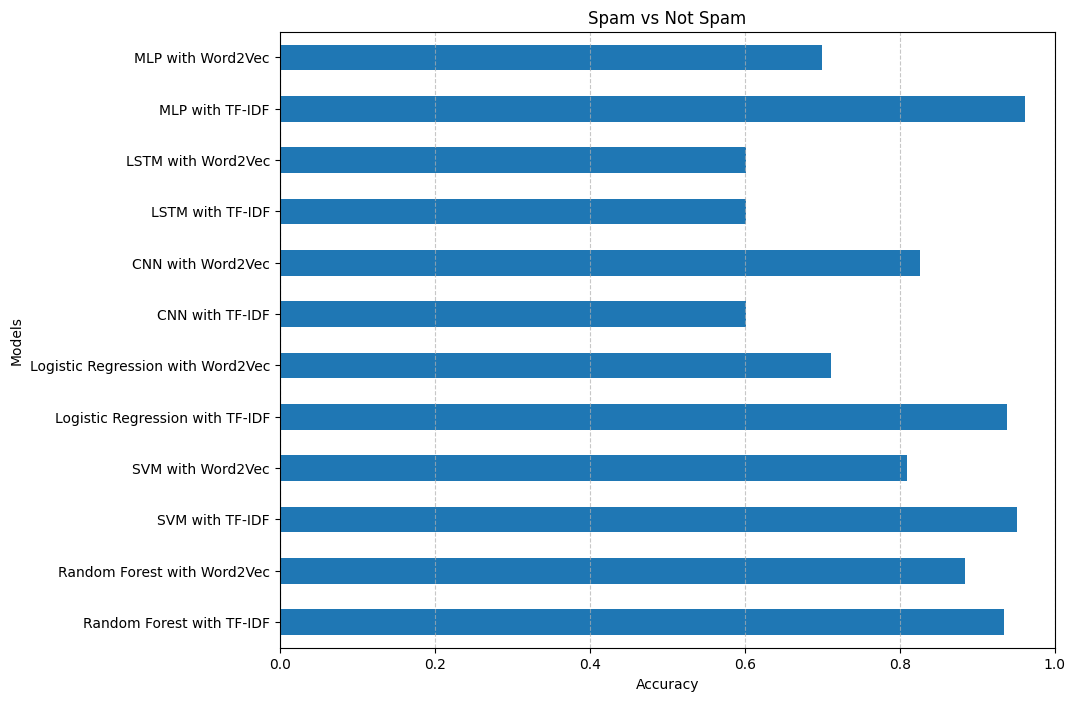

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Function to evaluate and collect accuracy from classification report
def get_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return report['accuracy']

# Model names
models = [
    "Random Forest with TF-IDF", "Random Forest with Word2Vec",
    "SVM with TF-IDF", "SVM with Word2Vec",
    "Logistic Regression with TF-IDF", "Logistic Regression with Word2Vec",
    "CNN with TF-IDF", "CNN with Word2Vec",
    "LSTM with TF-IDF", "LSTM with Word2Vec",
    "MLP with TF-IDF", "MLP with Word2Vec"
]

# Predictions for each model (Replace these variables with your actual predictions)
y_preds = [
    test_predictions_tfidf, test_predictions_w2v,
    test_svc, test_svc_class,
    y_pred_cnn_tfidf, y_pred_cnn_w2v,
    y_pred_lstm_tfidf, y_pred_lstm_w2v,
    y_pred_mlp_tfidf, y_pred_mlp_w2v
]

# List to store the accuracies
accuracies = []

# Evaluate each model and collect accuracy
for i in range(len(models)):
    accuracy = get_accuracy(y_test, y_preds[i])
    accuracies.append(accuracy)

# Convert accuracies to DataFrame for visualization
accuracy_df = pd.DataFrame({'Accuracy': accuracies}, index=models)

# Visualization: Bar Plot for model accuracy comparison
accuracy_df.plot(kind='barh', figsize=(10, 8), color='#1f77b4', legend=False)
plt.title('Spam vs Not Spam')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## **Model Performance Comparison (based on accuracy): Spam vs Not Spam**

### **Performance Comparison Table**

| **Model**                          | **Accuracy (TF-IDF)** | **Accuracy (Word2Vec)** |
|------------------------------------|-----------------------|-------------------------|
| **Random Forest**                  | 93%                   | 88%                     |
| **SVM**                             | 95%                   | 81%                     |
| **Logistic Regression**            | 94%                   | 71%                     |
| **CNN**                             | 60%                   | 83%                     |
| **LSTM**                            | 60%                   | 60%                     |
| **MLP**                             | 96%                   | 70%                     |

#### From result above, we can conclude that **MLP with TF-IDF** has the best performance, as it provides the highest accuracy among all tested models.
---

### **Top 3 Models Based on Accuracy:**

1. **MLP (TF-IDF)**
   - **Accuracy**: 96%
   - This model delivers the best performance among all tested models with a very high accuracy.

2. **SVM (TF-IDF)**
   - **Accuracy**: 95%
   - SVM with TF-IDF also shows excellent performance, closely following MLP with a small margin.

3. **Logistic Regression (TF-IDF)**
   - **Accuracy**: 94%
   - Logistic Regression with TF-IDF ranks third but still offers solid performance.
---
###**Conclusion**
**TF-IDF models** outperform **Word2Vec models**, with **MLP with TF-IDF** providing the best results overall. While, models using **CNN** and **LSTM** need further adjustments to perform effectively.


# **Second Stage**

In the **second stage** of our text mining project, our primary focus is on classifying reviews as either **sensitive** or **insensitive**. To simplify the process and avoid unnecessary complexity at this stage, we created a **new DataFrame** that **excludes** column which is "spamNotSpam".

## **Exploratory Data Analysis**

In [ ]:
# Stage 2: Filter data to include only Spam (1)
print("\nStage 2: Filter Data for Spam Only")

# Filter data to keep only rows where spamNotspam == 1
df2 = data[data['spamNotspam'] == 1].copy()

# Drop the 'spamNotspam' column
df2 = df2.drop(columns=['spamNotspam'])

# Display the modified DataFrame
print("DataFrame without 'spamNotspam':")
df2.head(10)


Stage 2: Filter Data for Spam Only
DataFrame without 'spamNotspam':


,reviewId,userName,userImage,sensitiveInsensitive,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Column1,Column2,Column3,Column4
0,79295c66-065c-4e96-b6be-dd45df3cde2b,Maylene Whittaker,https://play-lh.googleusercontent.com/a/ALm5wu...,0.0,"Hate speech everywhere, TikTok is trash!",4,0,2564.0,11/29/22 21:55,NaN,not spam,1557.0,NaN,NaN,NaN
1,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,0.0,No words,5,0,2713.0,11/29/22 21:55,NaN,spam,1035.0,NaN,NaN,NaN
2,21f16893-f26f-4a72-8a2f-85795e5ea9a4,Barbiee,https://play-lh.googleusercontent.com/a/ALm5wu...,1.0,"This app is for pedos, get out now!",5,0,NaN,11/29/22 21:54,NaN,total,2592.0,NaN,NaN,NaN
7,cb9310fb-f375-4136-afc9-64882e4851cf,Md Yeasin Khan Army,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,Fuck Biden!,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
8,1b22eaaa-c9a4-430b-b989-234fc8d756c4,Muhammad Rehan,https://play-lh.googleusercontent.com/a/ALm5wu...,0.0,Mohammed Rehan,5,0,2713.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN
16,bb7935b0-89e4-42c0-81ee-7812930e0e55,Yusuf Zmusa,https://play-lh.googleusercontent.com/a/ALm5wu...,1.0,"Fuck TikTok, it’s full of Chinese spies!",1,0,2564.0,11/29/22 21:47,NaN,NaN,NaN,NaN,NaN,NaN
18,5ea10a4b-892d-4761-b3a5-bbe4724a8fa7,Reno Mizzi,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,racist as hell!,5,0,2179.0,11/29/22 21:46,NaN,NaN,NaN,NaN,NaN,NaN
24,4dcdce82-e435-4bc6-8544-3da6f3f96afa,Abdullah Baloch,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,"Send nudes, lmao.",5,0,2554.0,11/29/22 21:39,NaN,NaN,NaN,NaN,NaN,NaN
28,4d7d77c8-5110-4430-a3d2-1ead630dbd5c,Nji Bismark Fru,https://play-lh.googleusercontent.com/a/ALm5wu...,1.0,"Racists are all over this app, lol.",5,0,2577.0,11/29/22 21:35,NaN,NaN,NaN,NaN,NaN,NaN
30,ba57180a-3f1a-46ff-aa17-027d395f1cc4,Queen Kuromi,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,Kill yourself if you’re using this toxic app!,4,0,NaN,11/29/22 21:32,NaN,NaN,NaN,NaN,NaN,NaN


From output above, we can see that the new DataFrame for sensitive spam classification has been created successfully. It includes only the relevant columns for detecting **sensitive** and **insensitive**.

In [ ]:
# Display basic information about the dataset
print("Basic Dataset Info:")
print(df2.info())

Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 2591
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              1035 non-null   object 
 1   userName              1035 non-null   object 
 2   userImage             1035 non-null   object 
 3   sensitiveInsensitive  1035 non-null   float64
 4   content               1035 non-null   object 
 5   score                 1035 non-null   int64  
 6   thumbsUpCount         1035 non-null   int64  
 7   reviewCreatedVersion  705 non-null    float64
 8   at                    1035 non-null   object 
 9   replyContent          0 non-null      float64
 10  repliedAt             3 non-null      object 
 11  Column1               3 non-null      float64
 12  Column2               0 non-null      float64
 13  Column3               0 non-null      float64
 14  Column4               0 non-null      float64
dtypes: flo

From output above, we can see the DataFrame has 15 columns, some with missing values and varying data types. We will analyze further to decide which columns will be used moving forward.

In [ ]:
df2.columns

Index(['reviewId', 'userName', 'userImage', 'sensitiveInsensitive', 'content',
       'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'Column1', 'Column2', 'Column3', 'Column4'],
      dtype='object')

In [ ]:
# Check unique values in each column
print("\nUnique Values per Column:")
print(df2.nunique())


Unique Values per Column:
reviewId                1035
userName                1029
userImage               1032
sensitiveInsensitive       2
content                 1007
score                      5
thumbsUpCount              5
reviewCreatedVersion      96
at                       720
replyContent               0
repliedAt                  3
Column1                    3
Column2                    0
Column3                    0
Column4                    0
dtype: int64


**Analysis**


From the output above, some columns contain unique values, while others have missing values or almost have no data.

Columns that have unique values:
- reviewId
- userName
- userImage

Columns that have missing values / no data:
- thumbsUpCount
- replyContent
- repliedAt
- Column1
- Column2
- Column3
- Column4


In [ ]:
# Show dataframe again
df2.head(10)

,reviewId,userName,userImage,sensitiveInsensitive,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Column1,Column2,Column3,Column4
0,79295c66-065c-4e96-b6be-dd45df3cde2b,Maylene Whittaker,https://play-lh.googleusercontent.com/a/ALm5wu...,0.0,"Hate speech everywhere, TikTok is trash!",4,0,2564.0,11/29/22 21:55,NaN,not spam,1557.0,NaN,NaN,NaN
1,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,0.0,No words,5,0,2713.0,11/29/22 21:55,NaN,spam,1035.0,NaN,NaN,NaN
2,21f16893-f26f-4a72-8a2f-85795e5ea9a4,Barbiee,https://play-lh.googleusercontent.com/a/ALm5wu...,1.0,"This app is for pedos, get out now!",5,0,NaN,11/29/22 21:54,NaN,total,2592.0,NaN,NaN,NaN
7,cb9310fb-f375-4136-afc9-64882e4851cf,Md Yeasin Khan Army,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,Fuck Biden!,5,0,NaN,11/29/22 21:52,NaN,NaN,NaN,NaN,NaN,NaN
8,1b22eaaa-c9a4-430b-b989-234fc8d756c4,Muhammad Rehan,https://play-lh.googleusercontent.com/a/ALm5wu...,0.0,Mohammed Rehan,5,0,2713.0,11/29/22 21:51,NaN,NaN,NaN,NaN,NaN,NaN
16,bb7935b0-89e4-42c0-81ee-7812930e0e55,Yusuf Zmusa,https://play-lh.googleusercontent.com/a/ALm5wu...,1.0,"Fuck TikTok, it’s full of Chinese spies!",1,0,2564.0,11/29/22 21:47,NaN,NaN,NaN,NaN,NaN,NaN
18,5ea10a4b-892d-4761-b3a5-bbe4724a8fa7,Reno Mizzi,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,racist as hell!,5,0,2179.0,11/29/22 21:46,NaN,NaN,NaN,NaN,NaN,NaN
24,4dcdce82-e435-4bc6-8544-3da6f3f96afa,Abdullah Baloch,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,"Send nudes, lmao.",5,0,2554.0,11/29/22 21:39,NaN,NaN,NaN,NaN,NaN,NaN
28,4d7d77c8-5110-4430-a3d2-1ead630dbd5c,Nji Bismark Fru,https://play-lh.googleusercontent.com/a/ALm5wu...,1.0,"Racists are all over this app, lol.",5,0,2577.0,11/29/22 21:35,NaN,NaN,NaN,NaN,NaN,NaN
30,ba57180a-3f1a-46ff-aa17-027d395f1cc4,Queen Kuromi,https://play-lh.googleusercontent.com/a-/ACNPE...,1.0,Kill yourself if you’re using this toxic app!,4,0,NaN,11/29/22 21:32,NaN,NaN,NaN,NaN,NaN,NaN


After further analysis of the DataFrame, we found that the **score** and **thumbsupcount** columns do not seem to be relevant for the analysis. These features do not contribute significantly to classifying sensitive versus insensitive reviews, so they will be excluded from the model.

### **Drop columns that we don't need**

Columns that we drop:
1. reviewId (has unique values)
2. userName (has unique values)
3. userImage (has unique values)
4. score (has no significant values)
5. thumbsUpCount (has no significant values)
6. at (has no significant values)
7. reviewCreatedVersion (too many missing values)
8. replyContent (has no data)
9. repliedAt (has no data)
10. Column1 (has no data)
11. Column2 (has no data)
12. Column3 (has no data)
13. Column4 (has no data)

In [ ]:
# Define the columns to drop
columns_to_drop = [
    'reviewId', 'userName', 'userImage','score',
       'thumbsUpCount', 'at','reviewCreatedVersion', 'replyContent', 'repliedAt',
    'Column1', 'Column2', 'Column3', 'Column4'
]

# Drop the specified columns from the DataFrame
df2 = df2.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame structure
print("Columns after dropping the specified ones:")
print(df2.info())


Columns after dropping the specified ones:
<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 2591
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sensitiveInsensitive  1035 non-null   float64
 1   content               1035 non-null   object 
dtypes: float64(1), object(1)
memory usage: 56.5+ KB
None


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1035 entries, 0 to 2591
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sensitiveInsensitive  1035 non-null   float64
 1   content               1035 non-null   object 
dtypes: float64(1), object(1)
memory usage: 56.5+ KB


After dropping the specified columns, the DataFrame now contains only 2 columns:

- sensitiveInsensitive (integer type)
- content (textual data type)

sensitiveInsensitive
0.0    652
1.0    383
Name: count, dtype: int64


<ipython-input-16-92aa289653c6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts1.index, y=label_counts.values, palette="viridis")


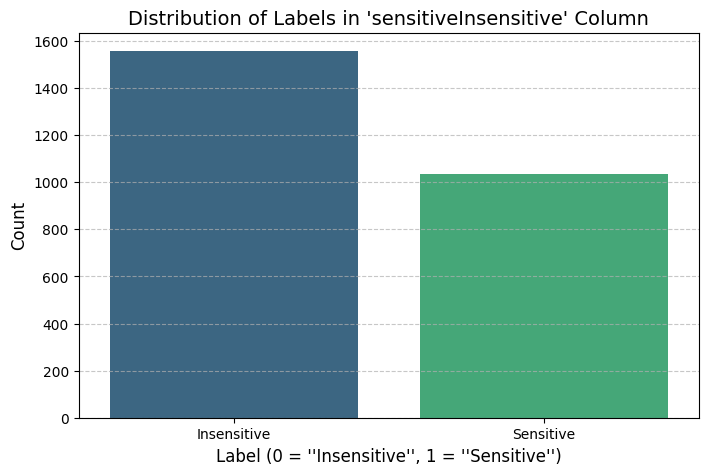

In [ ]:
# Check the distribution of labels in the 'sensitiveInsensitive' column
label_counts1 = df2['sensitiveInsensitive'].value_counts()
print(label_counts1)

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts1.index, y=label_counts.values, palette="viridis")

# Add details to the plot
plt.title("Distribution of Labels in 'sensitiveInsensitive' Column", fontsize=14)
plt.xlabel("Label (0 = ''Insensitive'', 1 = ''Sensitive'')", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['Insensitive', 'Sensitive'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From output above, we can see the dataset's label distribution for the `sensitiveInsensitive` column is as follows:  

- **Label `0` (Insensitive)**: 1,557 samples  
- **Label `1` (Sensitive)**: 1,035 samples  

This indicates that there are more **insensitive reviews** than **sensitive reviews**, leading to an imbalance in the dataset. Despite this imbalance, we aim to develop a model capable of handling imbalanced data effectively. Therefore, we have chosen not to apply additional data balancing techniques, relying on the model's ability to generalize well across both classes.

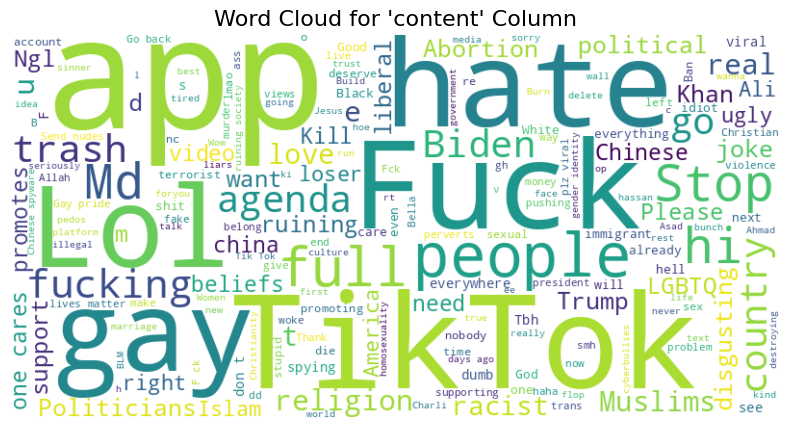

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all text in the 'content' column
text = " ".join(content for content in df2['content'])

# Define stopwords to exclude common words
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    stopwords=stopwords,
    colormap='viridis',
    max_words=200
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title("Word Cloud for 'content' Column", fontsize=16)
plt.show()


In the word cloud, there are some frequent words like **"fuck," "app," "tiktok"**.

These words have specific meanings:

- **"Fuck"**: Indicates harsh word, common in sensitive reviews.
- **"App"**: Refers to the application being reviewed, appearing often in legitimate reviews.
- **"Tiktok"**: Highlights reviews related to the TikTok app, which may help identify spammy content or trends.

These words help distinguish between spam and non-spam reviews.

**Notes:**
In the word cloud analysis, some typos were observed in the text. However, we have decided not to handle these typos, as they do not significantly affect the analysis. Additionally, we want the model to be able to handle and generalize well even in the presence of typos. Therefore, we have chosen not to apply any typo correction techniques, allowing the model to learn patterns in the data as is.

## **Data Preprocessing**

### **Reset Index**

After filtering, the indices may no longer be consecutive (e.g., `[0, 3, 7, 9]`), which can lead to confusion during further analysis or iteration.Therefore, we need to reset the index to create a sequential index.


In [ ]:
# Check the available indices in the DataFrame
print("Available indices in the DataFrame:")
print(df2.index)

Available indices in the DataFrame:
Index([   0,    1,    2,    7,    8,   16,   18,   24,   28,   30,
       ...
       2565, 2567, 2575, 2577, 2579, 2581, 2583, 2587, 2590, 2591],
      dtype='int64', length=1035)


In [ ]:
# Reset the index to ensure sequential order
df2 = df2.reset_index(drop=True)

### **Data Cleansing**

- Convert all text to lowercase.  
- Remove numbers
- Remove punctuation marks, and characters such as `!`, `•`.  
- Handle emoticons  
- Remove symbols
- Remove extra white spaces that may appear after removing characters.  


#### **Handle Emoticons**

In [ ]:
# Access the row with index 300 after resetting
print(df2.loc[300, 'content'])

Hi Shila 🥰🥰🥰🥰


In [ ]:
# Access the row with index 31 after resetting
print(df2.loc[31, 'content'])

 homosexuality🏳️‍🌈


From the outputs above, we see that some emojis convey positive or neutral meanings, while others may seem negative or harmful. Emojis play a role in defining whether a review is spam, so instead of removing them, we will flag them to help the model distinguish between sensitive and insensitive.

#### **Set Emoticons**

**Emoticons in regex that we listed**

Below are examples of some of the emojis that are detected by each range specified in regex:

1. **Emoticons (😀 - 😯)**: These are facial expressions and emotions.
   - Example Emojis: 😀, 😁, 😂, 😍, 😎, 😭, 😤

2. **Miscellaneous Symbols and Pictographs (🀀 - 🧿)**: This block includes various symbols and pictographs, including weather, food, and objects.
   - Example Emojis: 🌞, ☀️, 🏅, 🍏, 🍕, 🧊, 🧿

3. **Transport and Map Symbols (🚀 - 🚿)**: This block includes symbols related to transport, geography, and directions.
   - Example Emojis: 🚗, 🚕, 🚠, 🛳, ✈️, 🛣️, 🏁

4. **Alchemical Symbols (🜀 - 🜿)**: This block includes alchemical and ancient symbols.
   - Example Emojis: 🜀, 🜁, 🜂, 🜃

5. **Geometric Shapes Extended (🟠 - 🔷)**: This block includes geometric shapes like circles, squares, and diamonds.
   - Example Emojis: 🟠, 🔵, 🔶, 🔷, 🔸, 🔺

6. **Supplemental Arrows-C (⤴️ - ⤻)**: This block includes various arrows used in navigation or other symbols.
   - Example Emojis: ⤴️, ⤵️, 🔽, 🔼

7. **Supplemental Symbols and Pictographs (🛑 - 🛠️)**: This block includes symbols used for various signs and other pictographs.
   - Example Emojis: 🛑, 🔒, 🔓, ⚡, 🛠️

8. **Chess Symbols (♟️ - ♞)**: This block includes chess-related symbols.
   - Example Emojis: ♟️, ♞, ♜, ♝, ♛, ♚

9. **Symbols and Pictographs Extended-A (🅰 - 🅾)**: This block includes more extended symbols and pictographs.
   - Example Emojis: 🅰, 🅾, 🅿️, 🏧

10. **Dingbats (✝️ - ✡️)**: This block includes a variety of symbols including crosses and religious symbols.
   - Example Emojis: ✝️, ✡️, 🕎, 🛐

11. **Enclosed Characters (🅾 - 🅿️)**: This includes enclosed alphanumeric characters.
   - Example Emojis: 🅾, 🅿️, 🅰, 🅱

12. **Regional Indicator Symbols (🇦🇺 - 🇿🇦)**: This block includes country flag symbols.
   - Example Emojis: 🇦🇺 (Australia), 🇬🇧 (United Kingdom), 🇯🇵 (Japan)

13. **Additional Symbols (⁉️ - ➕)**: This block includes other symbols and punctuation marks.
   - Example Emojis: ⁉️, ➕, ➖, 🔃

14. **Playing Cards (🃏 - 🀄)**: This block includes playing card symbols.
   - Example Emojis: 🃏, 🀄, 🃁, 🃂


**Emoticons in regex that we listed**

Below are examples of some of the emojis that are detected by each range specified in regex:

1. **Emoticons (😀 - 😯)**: These are facial expressions and emotions.
   - Example Emojis: 😀, 😁, 😂, 😍, 😎, 😭, 😤

2. **Miscellaneous Symbols and Pictographs (🀀 - 🧿)**: This block includes various symbols and pictographs, including weather, food, and objects.
   - Example Emojis: 🌞, ☀️, 🏅, 🍏, 🍕, 🧊, 🧿

3. **Transport and Map Symbols (🚀 - 🚿)**: This block includes symbols related to transport, geography, and directions.
   - Example Emojis: 🚗, 🚕, 🚠, 🛳, ✈️, 🛣️, 🏁

4. **Alchemical Symbols (🜀 - 🜿)**: This block includes alchemical and ancient symbols.
   - Example Emojis: 🜀, 🜁, 🜂, 🜃

5. **Geometric Shapes Extended (🟠 - 🔷)**: This block includes geometric shapes like circles, squares, and diamonds.
   - Example Emojis: 🟠, 🔵, 🔶, 🔷, 🔸, 🔺

6. **Supplemental Arrows-C (⤴️ - ⤻)**: This block includes various arrows used in navigation or other symbols.
   - Example Emojis: ⤴️, ⤵️, 🔽, 🔼

7. **Supplemental Symbols and Pictographs (🛑 - 🛠️)**: This block includes symbols used for various signs and other pictographs.
   - Example Emojis: 🛑, 🔒, 🔓, ⚡, 🛠️

8. **Chess Symbols (♟️ - ♞)**: This block includes chess-related symbols.
   - Example Emojis: ♟️, ♞, ♜, ♝, ♛, ♚

9. **Symbols and Pictographs Extended-A (🅰 - 🅾)**: This block includes more extended symbols and pictographs.
   - Example Emojis: 🅰, 🅾, 🅿️, 🏧

10. **Dingbats (✝️ - ✡️)**: This block includes a variety of symbols including crosses and religious symbols.
   - Example Emojis: ✝️, ✡️, 🕎, 🛐

11. **Enclosed Characters (🅾 - 🅿️)**: This includes enclosed alphanumeric characters.
   - Example Emojis: 🅾, 🅿️, 🅰, 🅱

12. **Regional Indicator Symbols (🇦🇺 - 🇿🇦)**: This block includes country flag symbols.
   - Example Emojis: 🇦🇺 (Australia), 🇬🇧 (United Kingdom), 🇯🇵 (Japan)

13. **Additional Symbols (⁉️ - ➕)**: This block includes other symbols and punctuation marks.
   - Example Emojis: ⁉️, ➕, ➖, 🔃

14. **Playing Cards (🃏 - 🀄)**: This block includes playing card symbols.
   - Example Emojis: 🃏, 🀄, 🃁, 🃂


In [ ]:
import re # using regular expression

# Define sensitive emojis
sensitive_emojis = set([
    '🏳️‍🌈', '🥵', '☠', '💀', '💒', '⛪', '🕌', '🕍', '🕋', '🛕', '🗡', '💣', '🧨', '🪓', '🔪', '✝', '☪', '🕉',
    '☸', '🪯', '✡', '🔯', '🕎', '☯', '☦', '🖕'
])

# Function to detect emojis using regular expression (updated to detect more emojis)
emoji_pattern = re.compile(
    '['
    '\U0001F600-\U0001F64F'  # Emoticons
    '\U0001F300-\U0001F5FF'  # Miscellaneous Symbols and Pictographs
    '\U0001F680-\U0001F6FF'  # Transport and Map Symbols
    '\U0001F700-\U0001F77F'  # Alchemical Symbols
    '\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
    '\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
    '\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
    '\U0001FA00-\U0001FA6F'  # Chess Symbols
    '\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
    '\U00002702-\U000027B0'  # Dingbats
    '\U000024C2-\U0001F251'  # Enclosed Characters
    '\U0001F1E6-\U0001F1FF'  # Regional Indicator Symbols
    '\U00002000-\U00002BFF'  # Additional symbols
    '\U0001F004-\U0001F0CF'  # Playing Cards
    ']+', flags=re.UNICODE)


#### **Cleansing**

In [ ]:
# Function to clean the text and flag emojis as either 'normal' or 'sensitive'
def clean_text_with_flags(text):
    # Convert all text to lowercase
    text = text.lower()

    # Remove numbers and specific symbols like '¹'
    text = re.sub(r'[\d¹]+', '', text)  # Remove digits and the symbol '¹'

    # Handle emoticons - Flag emojis as 'normal' or 'sensitive' directly within the text
    def flag_emoticons(match):
        emoji_char = match.group(0)
        if emoji_char in sensitive_emojis:
            return '[ sensitive]'
        else:
            return '[ normal]'

    # Replace emojis with a flag (normal or sensitive) and remove them from the text
    text = emoji_pattern.sub(flag_emoticons, text)

    # Remove symbols or any character that is NOT a letter or space
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters, keep spaces

    # Remove punctuation marks (except emojis)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation marks (but keep spaces and words)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Apply the clean_text_with_flags function and store the result in a new column
df2['cleaned_content'] = df2['content'].apply(clean_text_with_flags)

# Display the cleaned data
display(df2[['content', 'cleaned_content']].iloc[30:300])

,content,cleaned_content
30,This app is run by abusive creeps!,this app is run by abusive creeps
31,homosexuality🏳️‍🌈,homosexuality sensitive
32,Send nudes if you want to chat with me!,send nudes if you want to chat with me
33,"TikTok is full of homophobes, lmao!",tiktok is full of homophobes lmao
34,MD israfil,md israfil
...,...,...
295,😎😎😎our duty is???people's happiness 🙏🙏🙏,normalour duty ispeoples happiness normal
296,Stop promoting gay rights,stop promoting gay rights
297,😁😁,normal
298,Christians are the only real people,christians are the only real people


In [ ]:
print(df2.loc[31, 'cleaned_content'])

homosexuality sensitive


In [ ]:
print(df2.loc[300, 'cleaned_content'])

hi shila normal


From the results above, we can see that the cleansing process has been successful. The "cleaned_content" column shows that irrelevant characters and emojis have been properly handled, ensuring that the content is now cleaner and more suitable for analysis.

### **Data Splitting**
Ratio:
- Training: 80%
- Testing: 20%

In [ ]:
df2.columns

Index(['sensitiveInsensitive', 'content', 'cleaned_content'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into Training and Testing Sets

x2 = df2[['cleaned_content']]
y2 = df2['sensitiveInsensitive']  # Label column

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42, stratify=df2['sensitiveInsensitive'])
# stratify on the label --> ensures the distribution in training and testing matches the original proportions


In [ ]:
X2_train.shape

(828, 1)

In [ ]:
X2_test.shape

(207, 1)

In [ ]:
y2_train.shape

(828,)

In [ ]:
y2_test.shape

(207,)

### **Check missing values**

In [ ]:
# Step 1: Checking for missing values
print("Missing values in each column:")
print(X2_train.isnull().sum())

Missing values in each column:
cleaned_content    0
dtype: int64


From output above, we can see that there are no missing values in X_train.

### **Tokenization**

In [ ]:
# Function for tokenization
def tokenize_text(text):
    return word_tokenize(text)

# Tokenization for 'cleaned_content' in training data
X2_train['tokenized_content'] = X2_train['cleaned_content'].apply(tokenize_text)

# Tokenization for 'cleaned_content' in testing data
X2_test['tokenized_content'] = X2_test['cleaned_content'].apply(tokenize_text)

In [ ]:
# Display comparison of before and after stopword removal
print(X2_train[['cleaned_content', 'tokenized_content']].head(4))

                              cleaned_content  \
933                   trans rights are a joke   
637                   v normaly normal normal   
353                 politicians are all liars   
823  seriously why do people support abortion   

                                   tokenized_content  
933                    [trans, rights, are, a, joke]  
637                     [v, normaly, normal, normal]  
353                   [politicians, are, all, liars]  
823  [seriously, why, do, people, support, abortion]  


From output above, we can see that the tokenization process was successful. Each comment has been broken down into individual tokens

### **Stopwords Removal**

In [ ]:
# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Remove stopwords from the 'tokenized_content' column for training and testing data
X2_train['stopwords_content'] = X2_train['tokenized_content'].apply(remove_stopwords)
X2_test['stopwords_content'] = X2_test['tokenized_content'].apply(remove_stopwords)

In [ ]:
# Display comparison of before and after stopword removal
print(X2_train[['tokenized_content', 'stopwords_content']].head(4))

                                   tokenized_content  \
933                    [trans, rights, are, a, joke]   
637                     [v, normaly, normal, normal]   
353                   [politicians, are, all, liars]   
823  [seriously, why, do, people, support, abortion]   

                          stopwords_content  
933                   [trans, rights, joke]  
637            [v, normaly, normal, normal]  
353                    [politicians, liars]  
823  [seriously, people, support, abortion]  


From output above we can see that stopwords like **"are," "a,"** and **"all"** are removed, while important tokens like **"rights," "joke," "seriously,"** and **"support"** remain.



### **Lemmatization / Stemming**

In [ ]:
# Install spacy
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Initialize the lemmatizer
import spacy

# Muat model bahasa Inggris
nlp = spacy.load("en_core_web_sm")

# Fungsi untuk lemmatization
def lemmatize_tokens_spacy(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]


# Apply lemmatization on the tokenized data after stopword removal
X2_train['lemmatized_content'] = X2_train['stopwords_content'].apply(lemmatize_tokens_spacy)
X2_test['lemmatized_content'] = X2_test['stopwords_content'].apply(lemmatize_tokens_spacy)

In [ ]:
# Display a sample of the data for comparison
print(X2_train[['stopwords_content', 'lemmatized_content']].iloc[221:225])

                       stopwords_content                lemmatized_content
319                   [hate, terrorists]                 [hate, terrorist]
161   [politicians, bunch, clowns, lmao]  [politician, bunch, clown, lmao]
875                                 [nc]                              [nc]
1021         [stop, pushing, agenda, us]          [stop, push, agenda, we]


From the output above, we can see that the lemmatization process successfully reduced words to their base forms. For example, the word "**terrorists**" was changed to "**terrorist**" or "**pushing**" was changed to "**push**" which is the base form of the verb.

## **Text Representation**

### **TF-IDF**

In [ ]:
# Initialize the TfidfVectorizer object
vectorizer = TfidfVectorizer()

In [ ]:
# Join tokens into single strings for each document in the training and testing datasets
aggregate2_texts_train = [' '.join(doc) for doc in X2_train['lemmatized_content']]
aggregate2_texts_test = [' '.join(doc) for doc in X2_test['lemmatized_content']]

In [ ]:
# Fit the vectorizer to the training data and transform the data into TF-IDF features
train2_tfidf= vectorizer.fit_transform(aggregate2_texts_train)

# Transform the testing data into TF-IDF features using the same vectorizer that was fit on the training data
test2_tfidf = vectorizer.transform(aggregate2_texts_test)  # This step does not involve fitting, only transforming

In [ ]:
# Convert the sparse matrix of train TF-IDF features to a dense DataFrame for better readability and display the first few rows
TFIDF_train2=pd.DataFrame(train2_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
TFIDF_train2.iloc[:, 48:52].head()

,alone,along,already,also
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [ ]:
# Convert the sparse matrix of test TF-IDF features to a dense DataFrame for better readability and display the first few rows
TFIDF_test2=pd.DataFrame(test2_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
TFIDF_test2.iloc[:, 48:52].head()

,alone,along,already,also
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [ ]:
# Display the shape of the TF-IDF matrix for the training data to understand the number of documents and features
train2_tfidf.shape

(828, 1066)

In [ ]:
# Display the shape of the TF-IDF matrix for the testing data to understand the number of documents and features
test2_tfidf.shape

(207, 1066)

In [ ]:
# Extract and display the column names of the TF-IDF feature matrix, which correspond to the terms in the vocabulary
col=TFIDF_train2.columns
print(col[48:52])

Index(['alone', 'along', 'already', 'also'], dtype='object')


In [ ]:
col=TFIDF_test2.columns
print(col[48:52])

Index(['alone', 'along', 'already', 'also'], dtype='object')


### **Word2Vec (skipgram)**

In [ ]:
# Initialize the Skipgram model using the Gensim library
model_skipgram = gensim.models.Word2Vec(X2_train['lemmatized_content'], min_count = 3, vector_size = 50, window = 5, sg=1) # Training algorithm: 1 for skip-gram; otherwise CBOW

#### **Average word vectors**

Used for traditional machine learning modeling

In [ ]:
# Define a function to convert lists of tokens into their corresponding word vectors using the trained model
def generate_word_vectors(tokens_list, model):
    vectors = []  # Initialize a list to store the result vectors
    for tokens in tokens_list:  # Iterate through each list of tokens
        # Convert each token to its vector representation if it exists in the model's vocabulary
        vectorized_tokens = [model.wv[word] if word in model.wv else None for word in tokens]
        # Filter out None values from vectorized tokens
        vectorized_tokens = [vector for vector in vectorized_tokens if vector is not None]

        if vectorized_tokens:
            # Compute the average vector if there are any valid vectors
            average_vector = sum(vectorized_tokens) / len(vectorized_tokens)
            vectors.append(average_vector)  # Append the average vector to the list
        else:
            # If no valid tokens are found, append a zero vector of the same length as the word vectors
            vectors.append([0] * model.vector_size)
    return vectors  # Return the list of vectors

In [ ]:
# Convert tokens in the training and tetsing data into vectors using the Skipgram model
x2_train_vectors_skipgram = generate_word_vectors(X2_train['lemmatized_content'], model_skipgram)
x2_test_vectors_skipgram = generate_word_vectors(X2_test['lemmatized_content'], model_skipgram)

In [ ]:
# Display the first two vectorized outputs from the training data
x2_train_vectors_skipgram[0:2]

[array([-0.00581645, -0.00789485,  0.00186964, -0.00608277, -0.00031733,
        -0.00118522, -0.00811096, -0.00049018,  0.00181051,  0.00277321,
        -0.01088821, -0.01430752,  0.000425  ,  0.00763955,  0.01052944,
         0.00680986,  0.00408998, -0.00805027, -0.00152773, -0.00813921,
         0.00217682, -0.00189182,  0.00663859, -0.00492901, -0.01084111,
         0.00885304,  0.00391797,  0.0099816 , -0.00262042, -0.0014002 ,
         0.00164036,  0.00097182, -0.00720671, -0.00970501,  0.0037509 ,
        -0.01386198,  0.01165059, -0.00650355, -0.00662034,  0.0047107 ,
         0.00279954, -0.0016898 , -0.00377022, -0.00605507,  0.00129071,
        -0.01764802, -0.01266419, -0.00127386,  0.01105297,  0.00489792],
       dtype=float32),
 array([-1.5210293e-03, -3.3521948e-05,  1.0002402e-02,  1.8259447e-02,
        -1.7340887e-02, -1.5254686e-02,  1.3098912e-02,  1.9028364e-02,
        -9.9863876e-03, -8.5359877e-03,  1.5314066e-02, -4.7890637e-03,
        -9.8760417e-03,  1.414

In [ ]:
# Display the first two vectorized outputs from the testing data
x2_test_vectors_skipgram[0:2]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 array([-1.5210293e-03, -3.3521948e-05,  1.0002402e-02,  1.8259447e-02,
        -1.7340887e-02, -1.5254686e-02,  1.3098912e-02,  1.9028364e-02,
        -9.9863876e-03, -8.5359877e-03,  1.5314066e-02, -4.7890637e-03,
        -9.8760417e-03,  1.4143910e-02, -9.4086239e-03, -2.4776622e-03,
         5.0425674e-03,  1.8979942e-03, -1.6869545e-02, -1.9457594e-02,
         1.4631562e-02,  1.0675993e-02,  1.4713531e-02,  1.7929750e-03,
         1.3448233e-02, -6.5250644e-03, -2.6255455e-03,  1.1202789e-02,
        -1.5668655e-02, -7.8295823e-03, -1.5026229e-02, -2.4133949e-03,
         1.9469894e-02, -1.5672844e-02, -5.4477751e-03, -3.3474464e-03,
         1.7039597e-02, -1.1946493e-02,  2.7142258e-04, -1.0212716e-02,
        -1.8191047e-02,  9.46

#### **Embedding matrix + Padding**

Used for Deep learning modeling

In [ ]:
# Embedding Matrix
from tensorflow.keras.preprocessing.text import Tokenizer

word_vec_dict = {word: model_skipgram.wv[word] for word in model_skipgram.wv.index_to_key}

# Parameters
vocab_size = 35000
embed_dim = model_skipgram.vector_size

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X2_train['lemmatized_content'])

In [ ]:
import numpy as np

embed_matrix = np.zeros((vocab_size, embed_dim))
for word, i in tokenizer.word_index.items():
    if word in word_vec_dict:  # Check if word is in word2vec dictionary
        embed_matrix[i] = word_vec_dict[word]

In [ ]:
print(f"Shape of embedding matrix: {embed_matrix.shape}")

Shape of embedding matrix: (35000, 50)


In [ ]:
# Padding sequences

from tensorflow.keras.preprocessing.sequence import pad_sequences

# Konversi teks ke sequence numerik
X2_train_seq = tokenizer.texts_to_sequences(X2_train['lemmatized_content'])
X2_test_seq = tokenizer.texts_to_sequences(X2_test['lemmatized_content'])

# Tentukan panjang maksimum (max_sen_len) berdasarkan analisis data
max_sen_len = max(len(seq) for seq in X2_train_seq)  # Bisa disesuaikan dengan domain data

# Padding sequences
X2_train_pad = pad_sequences(X2_train_seq, maxlen=max_sen_len, padding='post', truncating='post')
X2_test_pad = pad_sequences(X2_test_seq, maxlen=max_sen_len, padding='post', truncating='post')

# Verifikasi bentuk data setelah padding
print(f"Shape of X_train_pad: {X2_train_pad.shape}")
print(f"Shape of X_test_pad: {X2_test_pad.shape}")

Shape of X_train_pad: (828, 73)
Shape of X_test_pad: (207, 73)


## **Modeling**

### **Traditional Machine Learning**

#### **Random Forest with TFIDF Method**

In [ ]:
# Create an instance Random Forest Classifier
rf2_class_tfidf = RandomForestClassifier(random_state=42)

# Train the model using TFIDF
rf2_class_tfidf.fit(train2_tfidf, y2_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the labels for the test set
test2_predictions_tfidf = rf2_class_tfidf.predict(test2_tfidf)

In [ ]:
# Dispaly classification report
print("Original Model Classification Report:")
print(classification_report(y2_test, test2_predictions_tfidf))

Original Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       130
         1.0       0.88      0.84      0.86        77

    accuracy                           0.90       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.90      0.90      0.90       207



#### **Random Forest - TF-IDF (Second Stage) Model Output**:

- **Accuracy**: The model achieved an accuracy of **90%**, correctly classifying 90% of the reviews in the second stage.

- **Precision**:
  - **Class 0 (insensitive)**: 91% precision, meaning 91% of reviews predicted as Class 0 (insensitive)  were actually Class 0 (insensitive).
  - **Class 1 (sensitive)**: 88% precision, meaning 88% of reviews predicted as Class 1 (sensitive) were actually Class 1 (sensitive).

- **Recall**:
  - **Class 0 (insensitive)**: 93% recall, meaning the model correctly identified 93% of all actual Class 0 (insensitive) reviews.
  - **Class 1 (sensitive)**: 84% recall, meaning the model correctly identified 84% of all actual Class 1 (sensitive) reviews.

- **F1-Score**:
  - **Class 0 (insensitive)**: 92%, showing strong performance for Class 0 (insensitive) classification.
  - **Class 1 (sensitive)**: 86%, reflecting good performance for identifying Class 1 (sensitive) content but with some room for improvement.

- **Macro Average**: 89% precision, 89% recall, and 89% F1-score across both classes.
- **Weighted Average**: 90% precision, 90% recall, and 90% F1-score, considering class imbalance.

The model performs well in both precision and recall, with a slight edge in identifying **Class 0 (insensitive) (insensitive)**.

#### **Random Forest with Word2Vec Method**

In [ ]:
# Create an instance of RandomForestClassifier with a fixed random state for reproducibility
rf2_class_w2v = RandomForestClassifier(random_state=42)

# Train the model using Word2Vec vector representation from the training data
rf2_class_w2v.fit(x2_train_vectors_skipgram, y2_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict labels for the test data using the trained model
test2_predictions_w2v = rf2_class_w2v.predict(x2_test_vectors_skipgram)

In [ ]:
# Display the classification report
print('\nOriginal Model Classification Report\n')
print(classification_report(y2_test, test2_predictions_w2v))


Original Model Classification Report

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       130
         1.0       0.87      0.90      0.88        77

    accuracy                           0.91       207
   macro avg       0.91      0.91      0.91       207
weighted avg       0.91      0.91      0.91       207



#### **Random Forest - Word2Vec (Second Stage) Model Output**:

- **Accuracy**: The model achieved an accuracy of **91%**, correctly classifying 91% of the reviews in the second stage.

- **Precision**:
  - **Class 0 (insensitive)**: 94% precision, meaning 94% of reviews predicted as **Class 0 (insensitive)** were actually **Class 0 (insensitive)**.
  - **Class 1 (sensitive)**: 87% precision, meaning 87% of reviews predicted as **Class 1 (sensitive)** were actually **Class 1 (sensitive)**.

- **Recall**:
  - **Class 0 (insensitive)**: 92% recall, meaning the model correctly identified 92% of all actual **Class 0 (insensitive)** reviews.
  - **Class 1 (sensitive)**: 90% recall, meaning the model correctly identified 90% of all actual **Class 1 (sensitive)** reviews.

- **F1-Score**:
  - **Class 0 (insensitive)**: 93%, indicating strong performance in detecting **Class 0 (insensitive)** content.
  - **Class 1 (sensitive)**: 88%, showing solid performance in identifying **Class 1 (sensitive)** content with room for slight improvement.

- **Macro Average**: 91% precision, 91% recall, and 91% F1-score across both classes.
- **Weighted Average**: 91% precision, 91% recall, and 91% F1-score, considering class imbalance.

The model shows balanced performance, with a slight advantage in **Class 0 (insensitive)** classification.

#### **SVM with TF-IDF Method**

In [ ]:
# Initialize the LineaarSVC model
svc2 = svm.LinearSVC( random_state=42)

# Fit the model on the training data
svc2.fit(train2_tfidf, y2_train)

LinearSVC(random_state=42)

In [ ]:
# Predict the labels for the test set
test2_svc=svc2.predict(test2_tfidf)

In [ ]:
# Display classification report
print('\nOriginal Model Classification Report\n')
print(classification_report(y2_test, test2_svc))


Original Model Classification Report

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       130
         1.0       0.91      0.87      0.89        77

    accuracy                           0.92       207
   macro avg       0.92      0.91      0.91       207
weighted avg       0.92      0.92      0.92       207



#### **SVM - TF-IDF (Second Stage) Model Output**:

- **Accuracy**: The model achieved an accuracy of **92%**, correctly classifying 92% of the reviews in the second stage.

- **Precision**:
  - **Class 0 (insensitive)**: 92% precision, meaning 92% of reviews predicted as **Class 0 (insensitive)** were actually **Class 0 (insensitive)**.
  - **Class 1 (sensitive)**: 91% precision, meaning 91% of reviews predicted as **Class 1 (sensitive)** were actually **Class 1 (sensitive)**.

- **Recall**:
  - **Class 0 (insensitive)**: 95% recall, meaning the model correctly identified 95% of all actual **Class 0 (insensitive)** reviews.
  - **Class 1 (sensitive)**: 87% recall, meaning the model correctly identified 87% of all actual **Class 1 (sensitive)** reviews.

- **F1-Score**:
  - **Class 0 (insensitive)**: 94%, indicating good performance in identifying **Class 0 (insensitive)** content.
  - **Class 1 (sensitive)**: 89%, showing solid performance in detecting **Class 1 (sensitive)** content with room for improvement.

- **Macro Average**: 92% precision, 91% recall, and 91% F1-score across both classes.
- **Weighted Average**: 92% precision, 92% recall, and 92% F1-score, considering class imbalance.

The model performs well overall, with strong precision and recall for **Class 0 (insensitive)** content and a slight drop for **Class 1 (sensitive)** content.

#### **SVM with Word2Vec Method**

In [ ]:
# Set up and fit an SVM model using LinearSVC with a random state for reproducibility
svc2_class= svm.LinearSVC( random_state=42)
svc2_class.fit(x2_train_vectors_skipgram, y2_train)

LinearSVC(random_state=42)

In [ ]:
# Predict using the fitted model and evaluate the model's performance
test2_svc_class=svc2_class.predict(x2_test_vectors_skipgram)

In [ ]:
# Print classification report
print('\nOriginal Model Classification Report\n')
print(classification_report(y2_test, test2_svc_class))


Original Model Classification Report

              precision    recall  f1-score   support

         0.0       0.63      0.99      0.77       130
         1.0       0.50      0.01      0.03        77

    accuracy                           0.63       207
   macro avg       0.56      0.50      0.40       207
weighted avg       0.58      0.63      0.49       207



#### **SVM - Word2Vec (Second Stage) Model Output**:

- **Accuracy**: The model achieved an accuracy of **63%**, correctly classifying 63% of the reviews in the second stage.

- **Precision**:
  - **Class 0 (insensitive)**: 63% precision, meaning 63% of reviews predicted as **Class 0 (insensitive)** were actually **Class 0 (insensitive)**.
  - **Class 1 (sensitive)**: 50% precision, meaning 50% of reviews predicted as **Class 1 (sensitive)** were actually **Class 1 (sensitive)**.

- **Recall**:
  - **Class 0 (insensitive)**: 99% recall, meaning the model correctly identified 99% of all actual **Class 0 (insensitive)** reviews.
  - **Class 1 (sensitive)**: 1% recall, meaning the model only identified 1% of all actual **Class 1 (sensitive)** reviews.

- **F1-Score**:
  - **Class 0 (insensitive)**: 77%, indicating good performance in identifying **Class 0 (insensitive)** content.
  - **Class 1 (sensitive)**: 3%, showing very poor performance in detecting **Class 1 (sensitive)** content.

- **Macro Average**: 56% precision, 50% recall, and 40% F1-score across both classes.
- **Weighted Average**: 58% precision, 63% recall, and 49% F1-score, reflecting the model’s bias toward **Class 0 (insensitive)** content.

The model performs well for **Class 0 (insensitive)** content but struggles significantly with **Class 1 (sensitive)** content, showing poor recall and precision for the latter.

#### **Logistic Regression with TF-IDF Method**

In [ ]:
# Train a Logistic Regression model
log2_reg = LogisticRegression(random_state=42, max_iter=1000)  # max_iter to avoid convergence warnings
log2_reg.fit(train2_tfidf, y2_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
test2_log = log2_reg.predict(test2_tfidf)

In [ ]:
# Print classification report (precision, recall, f1-score, etc.)
print("\nOriginal Model Classification Report:")
print(classification_report(y2_test, test2_log))


Original Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       130
         1.0       0.91      0.77      0.83        77

    accuracy                           0.88       207
   macro avg       0.89      0.86      0.87       207
weighted avg       0.89      0.88      0.88       207



#### **Logistic Regression - TF-IDF (Second Stage) Model Output**:

- **Accuracy**: The model achieved an accuracy of **88%**, correctly classifying 88% of the reviews in the second stage.

- **Precision**:
  - **Class 0 (insensitive)**: 87% precision, meaning 87% of reviews predicted as **Class 0 (insensitive)** were actually **Class 0 (insensitive)**.
  - **Class 1 (sensitive)**: 91% precision, meaning 91% of reviews predicted as **Class 1 (sensitive)** were actually **Class 1 (sensitive)**.

- **Recall**:
  - **Class 0 (insensitive)**: 95% recall, meaning the model correctly identified 95% of all actual **Class 0 (insensitive)** reviews.
  - **Class 1 (sensitive)**: 77% recall, meaning the model correctly identified 77% of all actual **Class 1 (sensitive)** reviews.

- **F1-Score**:
  - **Class 0 (insensitive)**: 91%, indicating strong performance in identifying **Class 0 (insensitive)** content.
  - **Class 1 (sensitive)**: 83%, showing good performance in detecting **Class 1 (sensitive)** content, but with room for improvement.

- **Macro Average**: 89% precision, 86% recall, and 87% F1-score across both classes.
- **Weighted Average**: 89% precision, 88% recall, and 88% F1-score, considering class imbalance.

The model performs well overall, with good precision and recall for both **Class 0 (insensitive)** and **Class 1 (sensitive)** content, though there is some room for improvement in detecting **Class 1 (sensitive)** content.

#### **Logistic Regression with Word2Vec Method**

In [ ]:
# Train a Logistic Regression model
log2_reg = LogisticRegression(random_state=42, max_iter=1000)  # max_iter to avoid convergence warnings
log2_reg.fit(x2_train_vectors_skipgram, y2_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Make predictions on the test set
test2_log_class = log2_reg.predict(x2_test_vectors_skipgram)

In [ ]:
# Print classification report (precision, recall, f1-score, etc.)
print("\nOriginal Model Classification Report:")
print(classification_report(y2_test, test2_log_class))


Original Model Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       130
         1.0       0.00      0.00      0.00        77

    accuracy                           0.63       207
   macro avg       0.31      0.50      0.39       207
weighted avg       0.39      0.63      0.48       207



#### **Logistic Regression - Word2Vec (Second Stage) Model Output**:

- **Accuracy**: The model achieved an accuracy of **63%**, correctly classifying 63% of the reviews in the second stage.

- **Precision**:
  - **Class 0 (insensitive)**: 63% precision, meaning 63% of reviews predicted as **Class 0 (insensitive)** were actually **Class 0 (insensitive)**.
  - **Class 1 (sensitive)**: 0% precision, meaning no reviews predicted as **Class 1 (sensitive)** were actually **Class 1 (sensitive)**.

- **Recall**:
  - **Class 0 (insensitive)**: 100% recall, meaning the model correctly identified all actual **Class 0 (insensitive)** reviews.
  - **Class 1 (sensitive)**: 0% recall, meaning the model failed to identify any actual **Class 1 (sensitive)** reviews.

- **F1-Score**:
  - **Class 0 (insensitive)**: 77%, indicating decent performance in identifying **Class 0 (insensitive)** content.
  - **Class 1 (sensitive)**: 0%, showing poor performance in detecting **Class 1 (sensitive)** content.

- **Macro Average**: 31% precision, 50% recall, and 39% F1-score across both classes.
- **Weighted Average**: 39% precision, 63% recall, and 48% F1-score, considering class imbalance.

The model performs poorly in detecting **Class 1 (sensitive)** content, with a significant imbalance in recall between **Class 0 (insensitive)** and **Class 1 (sensitive)** content.

### **Deep Learning**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Embedding, Flatten, Dropout

**Model Main Parameters:**

- **Dropout rate**: 0.5 (used to prevent overfitting by randomly dropping 50% of neurons during training).
- **Epoch**: 10
- **Activation functions**:  
  - **ReLU**: Applied in hidden layers for non-linear transformations.  
  - **Sigmoid**: Used in the output layer for binary classification tasks.  
- **Optimizer**: Adam (an adaptive and efficient optimization algorithm suitable for deep learning).  
- **Loss function**: Binary Crossentropy (measures the performance of binary classification models).  

#### **CNN Model**

In [ ]:
def build_cnn_model(input_shape, embedding_matrix=None):
    model = Sequential()  # Create a Sequential model to add layers sequentially

    # Embedding layer: Used for converting input data (text) into dense vectors
    if embedding_matrix is not None:  # If an embedding matrix is provided
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], weights=[embedding_matrix], input_length=input_shape[2], trainable=False))  # Use provided embedding matrix, don't train it
    else:
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], input_length=input_shape[2]))  # If no embedding matrix, train the embeddings from scratch

    # Convolutional layer: Applies filters to the input to extract features
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # Apply 128 filters with a kernel size of 5 and ReLU activation

    model.add(MaxPooling1D(pool_size=2))  # MaxPooling layer to reduce the dimensionality by taking the maximum value from a set of values

    # Flatten layer: Converts the 2D data into 1D so it can be passed to the Dense layers
    model.add(Flatten())  # Flatten the 2D output into a 1D vector

    # Dense layer: Fully connected layer that learns complex features
    model.add(Dense(128, activation='relu'))  # Add a Dense layer with 128 units and ReLU activation

    model.add(Dropout(0.5))  # Dropout layer to prevent overfitting by randomly setting 50% of the neurons to 0 during training

    model.add(Dense(64, activation='relu'))  # Add another Dense layer with 64 units and ReLU activation

    # Output layer: Outputs the prediction for binary classification (0 or 1)
    model.add(Dense(1, activation='sigmoid'))  # Add the output layer with 1 unit and sigmoid activation for binary classification

    # Compile the model with Adam optimizer and binary cross-entropy loss function for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model  # Return the constructed model

#### **CNN with TFIDF Method**

In [ ]:
# Train the CNN model
cnn_tfidf2 = build_cnn_model((train2_tfidf.shape[0], train2_tfidf.shape[1], 1))
cnn_tfidf2.fit(train2_tfidf.toarray(), y2_train, epochs=10, batch_size=64, validation_data=(test2_tfidf.toarray(), y2_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 706ms/step - accuracy: 0.5364 - loss: 0.8304 - val_accuracy: 0.6280 - val_loss: 0.6638
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6274 - loss: 0.6811 - val_accuracy: 0.6280 - val_loss: 0.6709
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.6045 - loss: 0.6787 - val_accuracy: 0.6280 - val_loss: 0.6884
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6260 - loss: 0.6876 - val_accuracy: 0.6280 - val_loss: 0.6834
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6197 - loss: 0.6827 - val_accuracy: 0.6280 - val_loss: 0.6771
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.6279 - loss: 0.6762 - val_accuracy: 0.6280 - val_loss: 0.6717
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.6358 - loss: 0.6692 - val_accuracy: 0.6280 - val_loss: 0.6677
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.6427 - loss: 0.6632 - val_accuracy: 0

In [ ]:
# Step 1: Predict probabilities on test data
y2_pred_cnn_tfidf = cnn_tfidf2.predict(test2_tfidf.toarray())

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y2_pred_cnn_tfidf = np.where(y2_pred_cnn_tfidf > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report:")
print(classification_report(y2_test, y2_pred_cnn_tfidf))


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       130
         1.0       0.00      0.00      0.00        77

    accuracy                           0.63       207
   macro avg       0.31      0.50      0.39       207
weighted avg       0.39      0.63      0.48       207



#### **CNN - TF-IDF Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy started at **53.64%** and increased slightly to around **62.30%** over 10 epochs, showing limited improvement.  
- **Validation Accuracy**: Remained constant at **62.80%**, indicating that the model struggled to generalize to new data despite training.  

##### **Classification Report**:  
- **Overall Accuracy**: **63%**, showing below-average performance.  
- **Class 0 (insensitive)**: The model identified **63%** of Class 0 (insensitive) with **100% recall**, resulting in a strong ability to detect this class.  
- **Class 1 (sensitive)**: The model failed to identify any Class 1 (sensitive) instances, with **0% precision and recall**, indicating poor handling of this class.  

##### **Indications of Underfitting**:  
The model shows underfitting, as it demonstrates limited learning and fails to improve its accuracy significantly. Its inability to classify Class 1 (sensitive) highlights a lack of feature learning for this category.  

##### **Conclusion**:  
The CNN model with TF-IDF performed poorly, particularly for Class 1 (sensitive).

#### **CNN with Word2Vec Method**

In [ ]:
cnn_word2vec2 = build_cnn_model((vocab_size, embed_dim, max_sen_len), embedding_matrix=embed_matrix)
cnn_word2vec2.fit(X2_train_pad, y2_train, epochs=10, batch_size=64, validation_data=(X2_test_pad, y2_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.5709 - loss: 0.6889 - val_accuracy: 0.6280 - val_loss: 0.6605
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6086 - loss: 0.6679 - val_accuracy: 0.6280 - val_loss: 0.6510
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6201 - loss: 0.6513 - val_accuracy: 0.6280 - val_loss: 0.6278
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6247 - loss: 0.6231 - val_accuracy: 0.6522 - val_loss: 0.5821
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6958 - loss: 0.5813 - val_accuracy: 0.7295 - val_loss: 0.5231
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7581 - loss: 0.4994 - val_accuracy: 0.8019 - val_loss: 0.4399
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8298 - loss: 0.4030 - val_accuracy: 0.8213 - val_loss: 0.3801
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8737 - loss: 0.3503 - val_accuracy: 0.8357 - val_los

In [ ]:
# Step 1: Predict probabilities on test data
y2_pred_cnn_w2v = cnn_word2vec2.predict(X2_test_pad)

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y2_pred_cnn_w2v = np.where(y2_pred_cnn_w2v > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (Word2Vec):")
print(classification_report(y2_test, y2_pred_cnn_w2v))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Classification Report (Word2Vec):
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       130
         1.0       0.88      0.69      0.77        77

    accuracy                           0.85       207
   macro avg       0.86      0.82      0.83       207
weighted avg       0.85      0.85      0.85       207



#### **CNN - Word2Vec Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy started at **57.09%** and showed significant improvement, reaching **88.68%** by the 10th epoch, indicating effective learning.  
- **Validation Accuracy**: Increased steadily, peaking at **85.02%**, demonstrating good generalization to unseen data.  

##### **Classification Report**:  
- **Overall Accuracy**: **85%**, showing strong performance.  
- **Class 0 (insensitive)**: Achieved **84% precision** and **95% recall**, effectively identifying Class 0 (insensitive) with high confidence and coverage.  
- **Class 1 (sensitive)**: Attained **88% precision** and **69% recall**, indicating better handling of this class compared to previous models, though recall could still improve.  


##### **Conclusion**:  
The CNN model with Word2Vec embeddings demonstrated substantial improvement over the TF-IDF-based model, achieving strong accuracy and balanced class performance.

#### **LSTM Model**

In [ ]:
def build_lstm_model(input_shape, embedding_matrix=None):
    model = Sequential()  # Create a Sequential model to add layers sequentially

    # Embedding layer: Converts input data into dense vectors (if embedding_matrix is provided, it uses the pre-trained weights)
    if embedding_matrix is not None:
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], weights=[embedding_matrix], input_length=input_shape[2], trainable=False))  # Use pre-trained embeddings (not trainable)
    else:
        model.add(Embedding(input_dim=input_shape[0], output_dim=input_shape[1], input_length=input_shape[2]))  # Train embeddings from scratch if no pre-trained matrix

    # LSTM layer: Long Short-Term Memory layer to capture sequential dependencies
    model.add(LSTM(128, return_sequences=False))  # LSTM with 128 units

    # Dense layer: Fully connected layer to learn complex features from the output of LSTM
    model.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation

    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate to prevent overfitting

    model.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation

    # Output layer: Outputs the prediction for binary classification (0 or 1)
    model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit and sigmoid activation for binary classification

    # Compile the model with Adam optimizer and binary cross-entropy loss function for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model  # Return the constructed model


#### **LSTM with TFIDF Method**

In [ ]:
lstm_tfidf2 = build_lstm_model((train2_tfidf.shape[0], train2_tfidf.shape[1], 1))
lstm_tfidf2.fit(train2_tfidf.toarray(), y2_train, epochs=10, batch_size=64, validation_data=(test2_tfidf.toarray(), y2_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.6155 - loss: 0.6741 - val_accuracy: 0.6280 - val_loss: 0.6601
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.6257 - loss: 0.6739 - val_accuracy: 0.6280 - val_loss: 0.6618
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.6364 - loss: 0.6593 - val_accuracy: 0.6280 - val_loss: 0.6639
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.6175 - loss: 0.6684 - val_accuracy: 0.6280 - val_loss: 0.6608
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.6264 - loss: 0.6649 - val_accuracy: 0.6280 - val_loss: 0.6606
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.6303 - loss: 0.6661 - val_accuracy: 0.6280 - val_loss: 0.6605
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.6398 - loss: 0.6555 - val_accuracy: 0.6280 - val_loss: 0.6649
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.6132 - loss: 0.6701 - val_accuracy: 0.

In [ ]:
# Step 1: Predict probabilities on test data
y2_pred_lstm_tfidf = lstm_tfidf2.predict(test2_tfidf.toarray())

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y2_pred_lstm_tfidf = np.where(y2_pred_lstm_tfidf > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (LSTM with TF-IDF):")
print(classification_report(y2_test, y2_pred_lstm_tfidf))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classification Report (LSTM with TF-IDF):
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       130
         1.0       0.00      0.00      0.00        77

    accuracy                           0.63       207
   macro avg       0.31      0.50      0.39       207
weighted avg       0.39      0.63      0.48       207



#### **LSTM - TF-IDF Model Output**  

##### **Training Results**:  
- **Training Accuracy**: Started at **61.55%**, showing minimal improvement over 10 epochs, ending at **61.40%**.  
- **Validation Accuracy**: Stagnated at **62.80%**, indicating the model struggled to generalize and learn meaningful patterns from the input.  

##### **Classification Report**:  
- **Overall Accuracy**: **63%**, reflecting poor performance in identifying both classes equally.  
- **Class 0 (insensitive)**: Achieved **63% precision** and **100% recall**, indicating that while all predictions for Class 0 (insensitive) were correct, the model defaulted to this class excessively.  
- **Class 1 (sensitive)**: Both precision and recall were **0%**, meaning the model failed to predict this class at all.  

##### **Observations**:  
1. **Lack of Learning**: The loss and accuracy trends suggest overfitting or inability to learn effectively from TF-IDF features, potentially due to incompatibility between LSTMs and sparse, high-dimensional data.  
2. **Class Imbalance Handling**: The model heavily favored Class 0 (insensitive), indicating poor handling of Class 1 (sensitive).  

##### **Conclusion**:  
The LSTM with TF-IDF performed poorly, likely due to a mismatch between the sparse TF-IDF features and the sequential learning capabilities of LSTMs.

#### **LSTM with Word2Vec Method**

In [ ]:
lstm_word2vec2 = build_lstm_model((vocab_size, embed_dim, max_sen_len), embedding_matrix=embed_matrix)
lstm_word2vec2.fit(X2_train_pad, y2_train, epochs=10, batch_size=64, validation_data=(X2_test_pad, y2_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6518 - loss: 0.6872 - val_accuracy: 0.6280 - val_loss: 0.6635
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6195 - loss: 0.6689 - val_accuracy: 0.6280 - val_loss: 0.6636
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6191 - loss: 0.6672 - val_accuracy: 0.6280 - val_loss: 0.6604
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6381 - loss: 0.6570 - val_accuracy: 0.6280 - val_loss: 0.6600
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6212 - loss: 0.6630 - val_accuracy: 0.6280 - val_loss: 0.6606
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6144 - loss: 0.6680 - val_accuracy: 0.6280 - val_loss: 0.6600
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6039 - loss: 0.6759 - val_accuracy: 0.6280 - val_loss: 0.6602
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6297 - loss: 0.6597 - val_accuracy: 0.6280 - va

In [ ]:
# Step 1: Predict probabilities on test data
y2_pred_lstm_w2v = lstm_word2vec2.predict(X2_test_pad)

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y2_pred_lstm_w2v = np.where(y2_pred_lstm_w2v > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (LSTM with Word2Vec):")
print(classification_report(y2_test, y2_pred_lstm_w2v))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Classification Report (LSTM with Word2Vec):
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       130
         1.0       0.00      0.00      0.00        77

    accuracy                           0.63       207
   macro avg       0.31      0.50      0.39       207
weighted avg       0.39      0.63      0.48       207



#### **LSTM - Word2Vec Model Output**

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy started at **65.18%** and showed slight variation, ultimately reaching **63.68%** by the 10th epoch, indicating minimal learning improvement over time.  
- **Validation Accuracy**: Remained steady at **62.80%**, suggesting the model struggled to generalize effectively to unseen data.  

##### **Classification Report**:  
- **Overall Accuracy**: **63%**, which reflects a moderate but stagnant model performance.  
- **Class 0 (insensitive)**: Achieved **63% precision** and **100% recall**, indicating that the model effectively identifies Class 0 (insensitive) instances but with a high false-positive rate.  
- **Class 1 (sensitive)**: Achieved **0% precision** and **0% recall**, showing the model's failure to identify any instances of Class 1 (sensitive).  


##### **Conclusion**:  
The LSTM model with Word2Vec embeddings showed a similar issue to the TF-IDF model, with strong bias towards one class (Class 0 (insensitive)). Despite the use of Word2Vec, the model's generalization capabilities remained poor, especially for Class 1 (sensitive).

#### **MLP with TFIDF Method**

In [ ]:
def build_mlp_model(input_shape):
    model = Sequential()  # Create a Sequential model to add layers sequentially

    # Dense layer: Fully connected layer to learn complex features from the input
    model.add(Dense(128, input_dim=input_shape[1], activation='relu'))  # Add a Dense layer with 128 units and ReLU activation

    model.add(Dropout(0.5))  # Dropout layer with 50% dropout rate to prevent overfitting

    model.add(Dense(64, activation='relu'))  # Add another Dense layer with 64 units and ReLU activation

    # Output layer: Outputs the prediction for binary classification (0 or 1)
    model.add(Dense(1, activation='sigmoid'))  # Add the output layer with 1 unit and sigmoid activation for binary classification

    # Compile the model with Adam optimizer and binary cross-entropy loss function for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model  # Return the constructed model


In [ ]:
# Build the MLP model with the correct input shape based on the number of features from TF-IDF
mlp_tfidf2 = build_mlp_model((train2_tfidf.shape[0], train2_tfidf.shape[1]))

# Train the MLP model with TF-IDF input data
mlp_tfidf2.fit(train2_tfidf.toarray(), y2_train, epochs=10, batch_size=64, validation_data=(test2_tfidf.toarray(), y2_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.5735 - loss: 0.6867 - val_accuracy: 0.6280 - val_loss: 0.6668
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6203 - loss: 0.6564 - val_accuracy: 0.6280 - val_loss: 0.6367
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6242 - loss: 0.6193 - val_accuracy: 0.6280 - val_loss: 0.5942
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6369 - loss: 0.5610 - val_accuracy: 0.6667 - val_loss: 0.5241
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7421 - loss: 0.4739 - val_accuracy: 0.8599 - val_loss: 0.4299
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9149 - loss: 0.3560 - val_accuracy: 0.9179 - val_loss: 0.3287
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9564 - loss: 0.2452 - val_accuracy: 0.9324 - val_loss: 0.2530
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.1481 - val_accuracy: 0.9420 - val_los

In [ ]:
# Step 1: Predict probabilities on the test data
y2_pred_mlp_tfidf = mlp_tfidf2.predict(test2_tfidf.toarray())

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y2_pred_mlp_tfidf = np.where(y2_pred_mlp_tfidf > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (MLP with TF-IDF):")
print(classification_report(y2_test, y2_pred_mlp_tfidf))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classification Report (MLP with TF-IDF):
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       130
         1.0       0.92      0.92      0.92        77

    accuracy                           0.94       207
   macro avg       0.94      0.94      0.94       207
weighted avg       0.94      0.94      0.94       207



#### **MLP - TF-IDF Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy improved significantly from **57.35%** in the first epoch to **97.92%** by the 10th epoch, demonstrating substantial progress in learning.  
- **Validation Accuracy**: Similarly, the validation accuracy increased from **62.80%** to **94.20%**, showing good generalization to unseen data.  

##### **Classification Report**:  
- **Overall Accuracy**: **94%**, indicating strong performance overall.  
- **Class 0 (insensitive)**: The model achieved **95%** precision and **95%** recall for Class 0 (insensitive), demonstrating excellent performance in detecting this class.  
- **Class 1 (sensitive)**: The model achieved **92%** precision and **92%** recall for Class 1 (sensitive), showing strong performance for the second class as well.  

##### **Conclusion**:  
The MLP model with TF-IDF performed very well, with high accuracy and balanced performance across both classes. It demonstrated excellent learning and generalization, handling both Class 0 (insensitive) and Class 1 (sensitive) effectively.

#### **MLP with Word2Vec Method**

In [ ]:
# Function to build MLP model
def build_mlp_model(input_shape):
    model = Sequential()

    # Use input_shape[0] because input_shape is now a tuple (3650,)
    model.add(Dense(128, input_dim=input_shape[0], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Flatten X_train_pad and X_test_pad
X2_train_flat = X2_train_pad.reshape(X2_train_pad.shape[0], -1)  # Flatten to (2073, 73*50)
X2_test_flat = X2_test_pad.reshape(X2_test_pad.shape[0], -1)    # Flatten to (519, 73*50)

In [ ]:
# Build the MLP model
mlp_word2vec2 = build_mlp_model((X2_train_flat.shape[1],))  # Now input shape is (3650,)

# Train the MLP model
mlp_word2vec2.fit(X2_train_flat, y2_train, epochs=10, batch_size=64, validation_data=(X2_test_flat, y2_test))

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.6324 - loss: 15.0221 - val_accuracy: 0.5072 - val_loss: 2.1644
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6365 - loss: 9.6989 - val_accuracy: 0.4155 - val_loss: 3.4643
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - loss: 6.4931 - val_accuracy: 0.4976 - val_loss: 1.7993
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6589 - loss: 5.6104 - val_accuracy: 0.7391 - val_loss: 2.0562
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6787 - loss: 5.7063 - val_accuracy: 0.8019 - val_loss: 1.4214
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 3.8502 - val_accuracy: 0.7391 - val_loss: 1.7624
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6759 - loss: 4.3564 - val_accuracy: 0.7440 - val_loss: 1.5763
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 5.1150 - val_accuracy: 0.7440 - val_lo

In [ ]:
# Step 1: Predict probabilities on the test data
y2_pred_mlp_w2v = mlp_word2vec2.predict(X2_test_flat)

# Step 2: Convert probabilities to binary predictions (threshold = 0.5)
y2_pred_mlp_w2v = np.where(y2_pred_mlp_w2v > 0.5, 1, 0)

# Step 3: Generate and display the classification report
print("Classification Report (MLP with Word2Vec):")
print(classification_report(y2_test, y2_pred_mlp_w2v))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classification Report (MLP with Word2Vec):
              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83       130
         1.0       0.83      0.44      0.58        77

    accuracy                           0.76       207
   macro avg       0.79      0.69      0.70       207
weighted avg       0.77      0.76      0.74       207



#### **MLP - Word2Vec Model Output**  

##### **Training Results**:  
- **Training Accuracy**: The model's accuracy increased from **63.24%** in the first epoch to **67.39%** by the 10th epoch, showing modest learning progress.  
- **Validation Accuracy**: Validation accuracy fluctuated but ended at **75.85%**, showing some degree of generalization despite inconsistencies in training.  

##### **Classification Report**:  
- **Overall Accuracy**: **76%**, indicating moderate performance overall.  
- **Class 0 (insensitive)**: The model achieved **74%** precision and **95%** recall for Class 0 (insensitive), demonstrating strong detection for this class.  
- **Class 1 (sensitive)**: The model showed **83%** precision but lower **44%** recall for Class 1 (sensitive), indicating that while it identified Class 1 (sensitive) instances accurately when it did, it missed many of them.  

##### **Conclusion**:  
The MLP model with Word2Vec performed moderately well, with a stronger performance on Class 0 (insensitive) than Class 1 (sensitive).

## **Model Evaluation**

In [ ]:
# Random Forest dengan TF-IDF
print("\nRandom Forest with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, test2_predictions_tfidf))

# Random Forest dengan Word2Vec
print("\nRandom Forest with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, test2_predictions_w2v))

# SVM dengan TF-IDF
print("\nSVM with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, test2_svc))

# SVM dengan Word2Vec
print("\nSVM with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, test2_svc_class))

# Logistic Regression dengan TF-IDF
print("\nLogistic Regression with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, test2_log))

# Logistic Regression dengan Word2Vec
print("\nLogistic Regression with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, test2_log_class))



Random Forest with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       130
         1.0       0.88      0.84      0.86        77

    accuracy                           0.90       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.90      0.90      0.90       207


Random Forest with Word2Vec Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       130
         1.0       0.87      0.90      0.88        77

    accuracy                           0.91       207
   macro avg       0.91      0.91      0.91       207
weighted avg       0.91      0.91      0.91       207


SVM with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       130
         1.0       0.91      0.87     

**Overall Assessment**:

- **Random Forest - TF-IDF** and **Random Forest - Word2Vec** performed well overall, with both models showing high accuracy and strong results for **Class 0 (insensitive)**. **Random Forest - Word2Vec** slightly outperformed in accuracy and recall for **Class 1 (sensitive)**, though **Random Forest - TF-IDF** showed slightly better precision for **Class 0 (insensitive)**.

- **SVM - TF-IDF** also demonstrated a strong performance, achieving high precision and recall for both classes, particularly **Class 0 (insensitive)**. It showed a slightly lower performance in detecting **Class 1 (sensitive)**, but still outperformed **SVM - Word2Vec**.

- **SVM - Word2Vec** struggled significantly, especially with **Class 1 (sensitive)** detection, showing very low precision and recall. It demonstrated a strong bias toward **Class 0 (insensitive)**, with a high recall but very poor detection of content.

- **Logistic Regression - TF-IDF** showed decent performance, especially in detecting **Class 0 (insensitive)**, but had lower recall for **Class 1 (sensitive)**, indicating room for improvement in detecting content.

- **Logistic Regression - Word2Vec** struggled the most, with extremely poor results for **Class 1 (sensitive)** and low precision for **Class 0 (insensitive)**, making it the least effective model in this comparison.

In summary, **Random Forest** models (both TF-IDF and Word2Vec) generally performed the best, with **SVM - TF-IDF** also showing strong results. **Logistic Regression - Word2Vec** performed poorly and requires significant optimization, particularly for detecting content (**Class 1 (sensitive)**).

In [ ]:
# Evaluating CNN with TF-IDF
print("\nCNN with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, y2_pred_cnn_tfidf))

# Evaluating CNN with Word2Vec
print("\nCNN with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, y2_pred_cnn_w2v))

# Evaluating LSTM with TF-IDF
print("\nLSTM with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, y2_pred_lstm_tfidf))

# Evaluating LSTM with Word2Vec
print("\nLSTM with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, y2_pred_lstm_w2v))

# Evaluating MLP with TF-IDF
print("\nMLP with TF-IDF Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, y2_pred_mlp_tfidf))

# Evaluating MLP with Word2Vec
print("\nMLP with Word2Vec Method Evaluation:")
print("Classification Report:")
print(classification_report(y2_test, y2_pred_mlp_w2v))


CNN with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       130
         1.0       0.00      0.00      0.00        77

    accuracy                           0.63       207
   macro avg       0.31      0.50      0.39       207
weighted avg       0.39      0.63      0.48       207


CNN with Word2Vec Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       130
         1.0       0.88      0.69      0.77        77

    accuracy                           0.85       207
   macro avg       0.86      0.82      0.83       207
weighted avg       0.85      0.85      0.85       207


LSTM with TF-IDF Method Evaluation:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.77       130
         1.0       0.00      0.00      0.00        77

  

**Overall Assessment**:

- The **MLP - TF-IDF** model performed the best, achieving **94% accuracy** with strong performance in both **Class 0 (insensitive)** and **Class 1 (sensitive)**, showing no signs of underfitting or overfitting.
- The **CNN - Word2Vec** model showed **good performance** with **85% accuracy**, with strong recall for **Class 0 (insensitive)** and acceptable recall for **Class 1 (sensitive)**, indicating it is better at classifying Class 0 (insensitive) while still needing some improvements in Class 1 (sensitive).
- The **MLP - Word2Vec** model performed **moderately** with **76% accuracy**, showing better recall for **Class 0 (insensitive)** but weaker performance in **Class 1 (sensitive)**. This indicates the model could be improved for more balanced class performance.
- The **CNN - TF-IDF**, **LSTM - TF-IDF**, and **LSTM - Word2Vec** models performed poorly, all with **63% accuracy** and very low recall for **Class 1 (sensitive)**. These models struggled significantly to classify **Class 1 (sensitive)**, indicating clear signs of underfitting and requiring substantial adjustments.

In summary, the **MLP models** demonstrated superior performance compared to other architectures, with **MLP - TF-IDF** emerging as the most effective model overall. The **CNN - Word2Vec** model showed good performance but needs more attention on **Class 1 (sensitive)** classification.

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Function to evaluate and collect metrics from classification report
def get_classification_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score']

# Model names
models = [
    "Random Forest with TF-IDF", "Random Forest with Word2Vec",
    "SVM with TF-IDF", "SVM with Word2Vec",
    "Logistic Regression with TF-IDF", "Logistic Regression with Word2Vec",
    "CNN with TF-IDF", "CNN with Word2Vec",
    "LSTM with TF-IDF", "LSTM with Word2Vec",
    "MLP with TF-IDF", "MLP with Word2Vec"
]

# Predictions for each model (Replace these variables with your actual predictions)
y_preds = [
    test2_predictions_tfidf, test2_predictions_w2v,
    test2_svc, test2_svc_class,
    test2_log, test2_log_class,
    y2_pred_cnn_tfidf, y2_pred_cnn_w2v,
    y2_pred_lstm_tfidf, y2_pred_lstm_w2v,
    y2_pred_mlp_tfidf, y2_pred_mlp_w2v
]

# List to store the metrics (accuracy, precision, recall, f1-score)
metrics = []

# Evaluate each model and collect metrics
for i in range(len(models)):
    accuracy, precision, recall, f1_score = get_classification_metrics(y2_test, y_preds[i])
    metrics.append([accuracy, precision, recall, f1_score])

# Convert metrics to DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics, columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'], index=models)

# Print the metrics table
print(metrics_df)

                                   Accuracy  Precision    Recall  F1-Score
Random Forest with TF-IDF          0.898551   0.894076  0.887463  0.890540
Random Forest with Word2Vec        0.913043   0.905459  0.909590  0.907424
SVM with TF-IDF                    0.917874   0.915109  0.908142  0.911389
SVM with Word2Vec                  0.628019   0.564634  0.502647  0.397733
Logistic Regression with TF-IDF    0.884058   0.890466  0.860040  0.871375
Logistic Regression with Word2Vec  0.628019   0.314010  0.500000  0.385757
CNN with TF-IDF                    0.628019   0.314010  0.500000  0.385757
CNN with Word2Vec                  0.850242   0.860034  0.817233  0.830905
LSTM with TF-IDF                   0.628019   0.314010  0.500000  0.385757
LSTM with Word2Vec                 0.628019   0.314010  0.500000  0.385757
MLP with TF-IDF                    0.942029   0.937962  0.937962  0.937962
MLP with Word2Vec                  0.758454   0.785116  0.693856  0.703676


From the output above, we can observe the following:

1. **Best Performing Models**:
   - **MLP with TF-IDF** is the top-performing model, with **94% accuracy**, and consistently strong **precision**, **recall**, and **F1-score** for both classes, indicating it is highly effective in classifying both **Class 0 (insensitive)** and **Class 1 (sensitive)**.
   - **Random Forest with Word2Vec** and **SVM with TF-IDF** also performed well with **91%** and **92% accuracy**, respectively, and balanced **precision** and **recall** across both classes.

2. **Word2Vec Models**:
   - Models using **Word2Vec** generally performed worse than their **TF-IDF counterparts**. For instance, **SVM with Word2Vec** and **Logistic Regression with Word2Vec** had lower accuracy (around **63%**) with very low **precision** and **recall** for **Class 1 (sensitive)**, showing that these models struggle to classify **Class 1 (sensitive)** effectively.




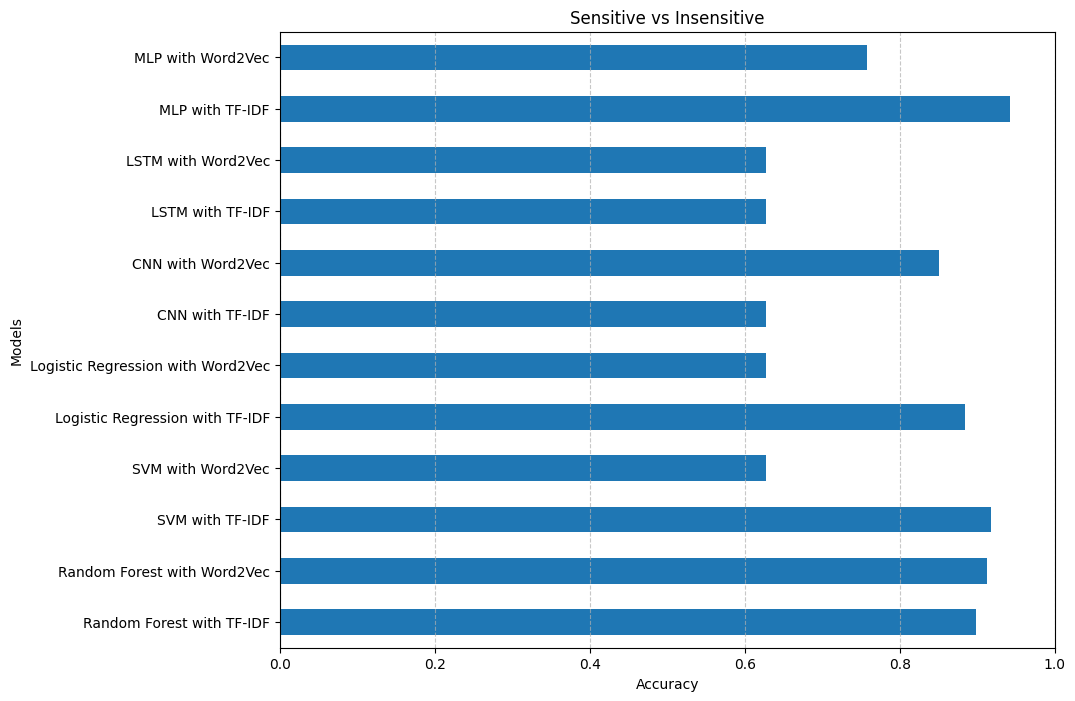

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Function to evaluate and collect accuracy from classification report
def get_accuracy(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return report['accuracy']

# Model names
models = [
    "Random Forest with TF-IDF", "Random Forest with Word2Vec",
    "SVM with TF-IDF", "SVM with Word2Vec",
    "Logistic Regression with TF-IDF", "Logistic Regression with Word2Vec",
    "CNN with TF-IDF", "CNN with Word2Vec",
    "LSTM with TF-IDF", "LSTM with Word2Vec",
    "MLP with TF-IDF", "MLP with Word2Vec"
]

# Predictions for each model (Replace these variables with your actual predictions)
y_preds = [
    test2_predictions_tfidf, test2_predictions_w2v,
    test2_svc, test2_svc_class,
    test2_log, test2_log_class,
    y2_pred_cnn_tfidf, y2_pred_cnn_w2v,
    y2_pred_lstm_tfidf, y2_pred_lstm_w2v,
    y2_pred_mlp_tfidf, y2_pred_mlp_w2v
]

# List to store the accuracies
accuracies = []

# Evaluate each model and collect accuracy
for i in range(len(models)):
    accuracy = get_accuracy(y2_test, y_preds[i])
    accuracies.append(accuracy)

# Convert accuracies to DataFrame for visualization
accuracy_df = pd.DataFrame({'Accuracy': accuracies}, index=models)

# Visualization: Bar Plot for model accuracy comparison
accuracy_df.plot(kind='barh', figsize=(10, 8), color='#1f77b4', legend=False)
plt.title('Sensitive vs Insensitive')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.xlim(0, 1)  # Assuming accuracy is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## **Model Performance Comparison (based on accuracy): Sensitive vs insensitive**

### **Performance Comparison Table**

| **Model**                          | **Accuracy (TF-IDF)** | **Accuracy (Word2Vec)** |
|------------------------------------|-----------------------|-------------------------|
| **Random Forest**                  | 90%                   | 91%                     |
| **SVM**                             | 92%                   | 63%                     |
| **Logistic Regression**            | 88%                   | 63%                     |
| **CNN**                             | 63%                   | 85%                     |
| **LSTM**                            | 63%                   | 63%                     |
| **MLP**                             | 94%                   | 76%                     |

#### From result above, we can conclude that **MLP with TF-IDF** has the best performance, as it provides the highest accuracy among all tested models.
---

### **Top 3 Models Based on Accuracy:**

1. **MLP (TF-IDF)**
   - **Accuracy**: 94%
   - MLP with TF-IDF delivers the best performance among all tested models, with the highest accuracy.

2. **SVM (TF-IDF)**
   - **Accuracy**: 92%
   - SVM with TF-IDF closely follows MLP, offering very good accuracy and strong overall performance.

3. **Random Forest (Word2Vec)**
   - **Accuracy**: 91%
   - Random Forest with Word2Vec also delivers excellent performance, showing accuracy equivalent to SVM with TF-IDF.

---

### **Conclusion**

Models based on **TF-IDF** generally outperform those based on **Word2Vec**, with **MLP with TF-IDF** delivering the best overall results. Models using **Word2Vec** struggle, especially in detecting **Class 1 (sensitive)**, and need improvement. Models like **CNN** and **LSTM** also require further adjustments to handle both classes effectively, particularly in identifying **Class 1 (sensitive)** reviews.